# HERA Auto-Correlation GAN Practice
### Joseph Shy
#### Week 4
Tutorial from "io_example.ipynb" in HERA_CAL/scripts
GAN model functions from 'tensorflow-practice-2-updated-quadratic-meeting.ipynb' in mylustre/machine_learning

### Version 3.1
- attempted to integrate multiple GPU mirrored training
- WORK IN PROGRESS [https://keras.io/guides/distributed_training/](URL)

The goal of this notebook is to integrate the machine learning techniques gathered from my previus machine learning practice with the `H4C` auto-correlation data on the observation julian date of `2459122`. The good `"ee"` auto-correlations for each and antenna and integration time is used as part of the detector training set for real values. **It is important to know whether to train `"ee"` and `"nn"` together or separately (or only one or the other) for the future.**

## 1. Organize Auto-Correlation Data

This section separates the `"ee"` auto-correlation data for the good antennas on the night of `2459122`. This type of data is `H4C`, which is a newer configuration of data for HERA. It was advised by Tyler Cox and Dr. Aaron Parsons to use this data categorization/type for preliminary training/practice for the GAN. The bad antennas for this night was derived from [https://docs.google.com/spreadsheets/d/1xFo2PLVUhXHe-yqHHl0WrRe5pXZF2zC8Z1fLqPZbPZ8/edit#gid=418790055](URL), which flags the bad antennas from manual validation processes. 

### Import Libraries

In [1]:
# import libraries from 'io_example.ipynb' that was used for importing/interfacing with HERA datatypes
from __future__ import absolute_import, division, print_function
import numpy as np
import os
from hera_cal.io import HERAData, HERACal
from hera_cal.data import DATA_PATH
import matplotlib.pyplot as plt

### Configure filepaths to auto-correlations
Below, list comprehension is used to create filepaths for each auto-correlation file for the night of `2459122`. The list `filename` is available at the bottom of this notebook (due to its large size crowding the rest of the notebook) containing each desired filename. The filenames were retrieved though the command line `ls` within the path `/lustre/aoc/projects/hera/H4C/2459122` within the NRAO servers. The filenames, in the configuration of a text file, is saved (at bottom of notebook due to it not being necessary for recurring use of the notebook) to the current directory for ease of access. The filepaths created below are also saved to a text file.

The following two cells were used when intially loading in data and saving.

In [5]:
#filepath = ['/lustre/aoc/projects/hera/H4C/2459122/{}'.format(k) for k in filename] # create filepath to each auto-crre;ati

In [6]:
# save list to text file
# with open("filepaths-autos_2459122.txt", "w") as f: # open a text file
#     for s in filepath: # iterate through all pathes
#         f.write(str(s) +",\n") # append filepath to text file

The two cells below are always ran when initializing the notebook for use.

In [2]:
# load in text file to list
filepath = open("filepaths-autos_2459122.txt", "r") # open file
filepath = filepath.readlines() # read in file line by line
filepath = [k.replace(',\n','') for k in filepath] # correct formatting, so list is ready for indexing and using

In [9]:
filepath # check to make sure list was created properly

['/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.25108.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.45934.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.25131.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.45957.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.25153.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.45979.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.25175.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.46002.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.25198.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.46024.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.25220.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.46046.sum.autos.uvh5',
 '/lustre/aoc/projects/hera/H4C/2459122/zen.2459122.25243.sum.autos.uvh5',
 '/lustre/aoc/projects/he

### Load in auto-correlation data
Below, all the auto-correlation data is loaded in for each integration time within the night of `2459122`. 

In [3]:
hd = HERAData(filepath) # read in all data files
data, flags, nsamples = hd.read() # call data from files

### Create auto-correlation data keys for bad antennas
Below, the loop creates key tuples in the standard of the keys within the HERA data containers. The `bad_ants` list is at the bottom of this notebook, just above the `filename`. It contains the integer labels of every manually flagged bad antenna for the given observation night. This list was retrieved from [https://docs.google.com/spreadsheets/d/1xFo2PLVUhXHe-yqHHl0WrRe5pXZF2zC8Z1fLqPZbPZ8/edit#gid=418790055](URL) which contains the manual bad antenna identification for the `H4C` auto-correlations.

The below cell was used when initially creating the list of good antenna keys. It is not used for all runs of the notebook.

In [17]:
# bad_key = [] # intialize list
# for ii, key in enumerate(bad_ants): # loop through bad antennas
#     # create tuple keys in HERA format
#     bad_key.append((key,key,'ee'))
#     bad_key.append((key,key,'nn'))

In [18]:
# bad_key # diplay list to make sure it loaded correctly 

[(0, 0, 'ee'),
 (0, 0, 'nn'),
 (1, 1, 'ee'),
 (1, 1, 'nn'),
 (2, 2, 'ee'),
 (2, 2, 'nn'),
 (11, 11, 'ee'),
 (11, 11, 'nn'),
 (12, 12, 'ee'),
 (12, 12, 'nn'),
 (13, 13, 'ee'),
 (13, 13, 'nn'),
 (14, 14, 'ee'),
 (14, 14, 'nn'),
 (23, 23, 'ee'),
 (23, 23, 'nn'),
 (24, 24, 'ee'),
 (24, 24, 'nn'),
 (25, 25, 'ee'),
 (25, 25, 'nn'),
 (26, 26, 'ee'),
 (26, 26, 'nn'),
 (37, 37, 'ee'),
 (37, 37, 'nn'),
 (38, 38, 'ee'),
 (38, 38, 'nn'),
 (39, 39, 'ee'),
 (39, 39, 'nn'),
 (44, 44, 'ee'),
 (44, 44, 'nn'),
 (45, 45, 'ee'),
 (45, 45, 'nn'),
 (46, 46, 'ee'),
 (46, 46, 'nn'),
 (51, 51, 'ee'),
 (51, 51, 'nn'),
 (52, 52, 'ee'),
 (52, 52, 'nn'),
 (59, 59, 'ee'),
 (59, 59, 'nn'),
 (65, 65, 'ee'),
 (65, 65, 'nn'),
 (67, 67, 'ee'),
 (67, 67, 'nn'),
 (73, 73, 'ee'),
 (73, 73, 'nn'),
 (75, 75, 'ee'),
 (75, 75, 'nn'),
 (81, 81, 'ee'),
 (81, 81, 'nn'),
 (84, 84, 'ee'),
 (84, 84, 'nn'),
 (86, 86, 'ee'),
 (86, 86, 'nn'),
 (87, 87, 'ee'),
 (87, 87, 'nn'),
 (88, 88, 'ee'),
 (88, 88, 'nn'),
 (89, 89, 'ee'),
 (89, 89,

### Organize good antenna keys
Below, the results from the section above is used to separate the bad keys from the good keys.

The below cell was used when first creating the list of good antenna keys. It was saved as a text file and loaded in for later runs.

In [19]:
# good_key = [] # initialize list
# for ii, key in enumerate(data.keys()): # loop through all data keys in HERA data container for specific time of observation
#     if key not in bad_key: # any tuple key that isnt bad, append to good key list
#         good_key.append(key)

In [20]:
# good_key # display list to make sure it loaded correctly

[(36, 36, 'ee'),
 (36, 36, 'nn'),
 (50, 50, 'ee'),
 (50, 50, 'nn'),
 (53, 53, 'ee'),
 (53, 53, 'nn'),
 (58, 58, 'ee'),
 (58, 58, 'nn'),
 (66, 66, 'ee'),
 (66, 66, 'nn'),
 (68, 68, 'ee'),
 (68, 68, 'nn'),
 (82, 82, 'ee'),
 (82, 82, 'nn'),
 (83, 83, 'ee'),
 (83, 83, 'nn'),
 (85, 85, 'ee'),
 (85, 85, 'nn'),
 (91, 91, 'ee'),
 (91, 91, 'nn'),
 (92, 92, 'ee'),
 (92, 92, 'nn'),
 (98, 98, 'ee'),
 (98, 98, 'nn'),
 (99, 99, 'ee'),
 (99, 99, 'nn'),
 (100, 100, 'ee'),
 (100, 100, 'nn'),
 (102, 102, 'ee'),
 (102, 102, 'nn'),
 (103, 103, 'ee'),
 (103, 103, 'nn'),
 (104, 104, 'ee'),
 (104, 104, 'nn'),
 (105, 105, 'ee'),
 (105, 105, 'nn'),
 (108, 108, 'ee'),
 (108, 108, 'nn'),
 (109, 109, 'ee'),
 (109, 109, 'nn'),
 (117, 117, 'ee'),
 (117, 117, 'nn'),
 (118, 118, 'ee'),
 (118, 118, 'nn'),
 (120, 120, 'ee'),
 (120, 120, 'nn'),
 (124, 124, 'ee'),
 (124, 124, 'nn'),
 (127, 127, 'ee'),
 (127, 127, 'nn'),
 (128, 128, 'ee'),
 (128, 128, 'nn'),
 (129, 129, 'ee'),
 (129, 129, 'nn'),
 (130, 130, 'ee'),
 (130, 

In [25]:
# # save list to text file
# with open("good-ant-keys_2459122.txt", "w") as f:
#     for s in good_key:
#         f.write(str(s) +",\n")

Load in good antenna key tuples for indexing into HERA `H4C` data,

In [4]:
# load in text file to list
good_key = open("good-ant-keys_2459122.txt", "r")
good_key = good_key.readlines()
good_key = [eval(k.replace(',\n','')) for k in good_key]

### Organize `"ee"` data
Below, the `"ee"` data is separate into its own list, as only the `"ee"` data is being used to train, for the time being.

In [5]:
good_key_ee = [] # intialize list
for ii, key in enumerate(good_key): # iterate through good antenna keys
    # only append the 'ee' keys
    if key[2] == 'ee':
        good_key_ee.append(key)

Checking to make sure data is organized as expected.

In [ ]:
good_key_ee[4][2]

In [19]:
good_key_ee[10][1]

92

In [29]:
data[good_key_ee[0]]

array([[ 6657537.+0.j,  6819190.+0.j,  6970961.+0.j, ..., 13981099.+0.j,
        13877749.+0.j, 13909107.+0.j],
       [ 6672200.+0.j,  6810244.+0.j,  6958710.+0.j, ..., 13997220.+0.j,
        13877623.+0.j, 13901141.+0.j],
       [ 6653817.+0.j,  6808382.+0.j,  6959117.+0.j, ..., 13979503.+0.j,
        13858455.+0.j, 13898037.+0.j],
       ...,
       [ 4328971.+0.j,  4413757.+0.j,  4507345.+0.j, ..., 10364687.+0.j,
        10262669.+0.j, 10216376.+0.j],
       [ 4322679.+0.j,  4415218.+0.j,  4512894.+0.j, ..., 10347660.+0.j,
        10263710.+0.j, 10220671.+0.j],
       [ 4319232.+0.j,  4402917.+0.j,  4504870.+0.j, ..., 10378108.+0.j,
        10251119.+0.j, 10210622.+0.j]])

## 2. Generative Adversarial Neural Network

In this section of the notebook, the functions from the parabolic GAN training practice are modified and integrated into this notebook. The goal is to train a generator to create realistic auto-correlations from the data organized in the previous section. The detector is also going to be trained to become increasingly better at detecting fake data that (hopefully) closely resembles real auto-correlations. If this can be accomplished with confidence and robustness, the detector should be able to detect an auto-correlations that deviate slightly from the expected norm, allowing automatic identification of bad antennas through their auto-correlations. Additionally, we will have a generator than can produce mock auto-correlations that could be used for a variety of simulations or practices.

### Import necessary libraries

In [9]:
import tensorflow as tf # import the tensflow library - necessary for any machine-learning task
import matplotlib.pyplot as plt # import matplotlib library for plotting purposes
import numpy as np # import numpy for array usage
from tensorflow import keras # import keras, the main sub-section of tensorflow being used

# import possible keras layers for use
from tensorflow.keras.models import Sequential # model type
from tensorflow.keras.layers import Dense # model layering
from tensorflow.keras.layers import Dropout # model layering
from tensorflow.keras.layers import GaussianNoise # model layering
from tensorflow.keras.layers import LeakyReLU # model layering
from tensorflow.keras.layers import Conv1D # model layering
from tensorflow.keras.layers import Input # model layering
from tensorflow.keras.layers import Conv1DTranspose # model layering
from tensorflow.keras.layers import Flatten # model layering
from tensorflow.keras.layers import Reshape # model layering
from tensorflow.keras import activations # layer activation models
from tensorflow.keras.optimizers import Adam # "Adam" optimization technique for model compile
from tensorflow.keras.layers import AveragePooling1D # pooling layer
from tensorflow.keras.layers import BatchNormalization # normalization layer

#from tensorflow.keras.utils import multi_gpu_model # TEST - trying to assign multiple gpus to a training job

from tensorflow.keras.utils import plot_model # plots sequential layered structure of NN models

from datetime import datetime # datetime module 

# jupyter notebook specific command to show plots inline 
%matplotlib inline 

### Configure GPUs
GPUs need to be assigned to tasks from this notebook, as tensorflow operates at higher rates with one or more dedicated GPUs.

In [9]:
# command to configure a GPU for use in machine learning 
os.environ["CUDA_VISIBLE_DEVICES"]="1"
tf_device='/gpu:0'

In [22]:
# TEST - trying to configure multiple GPUs
strategy = tf.distribute.MirroredStrategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Number of devices: 2


### Build detector NN
Below, the detector neural network is created. Convolutional layers `(Conv1D)` make up the majority of the sequential layers in this model, as convolutional layers do well in picking out features of plots and images. Given the large number of minute features in auto-correlations, convolutional layers are the preferred/primary form of layering. `LeakyRelU` activation layers are used for the `Conv1D` layers, as advised by [https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/](URL). It seems to be becoming a more common practice to use this type of activation layers for GANs. `Dropouts` are integrated in order to avoid over-fitting to the training set. Lastly, a `Dense` mapping layer, assigns the auto-correlations to a `0` or a `1` (fake or real, respectively) using `sigmoid` activation. The model is compiled with `binary_crossentropy`, as this is best for binary classification NNs. **Note: Various parameters within the layers are changed (and sometimes layers are removed or rearranged) and documented for different training attempts.**

In [39]:
# build detector function
def define_detector(n_inputs,batch_size):
    """Build a detector NN that detects if a one-dimensional dataset at a explicit linearly spaced channels (x-axis) is a "real" or "fake" dataset based upon a training.
    
    Arguments:
    n_inputs (int) -- amount of values in a single one-dimensional dataset
    batch_size (int) -- number of datasets fed into detector at each training call
    
    Returns:
    model (tensorflow.python.keras.engine.sequential.Sequential) -- tensorflow keras compiled sequentially-layered model
    
    """
    with strategy.scope():
        model = Sequential(
            [

    #            GaussianNoise(0.1,input_shape=(n_inputs,1),batch_size=batch_size),
    #            Dropout(0.1,input_shape=(n_inputs,1),batch_size=batch_size),

                # first two 1D convolutional layers

                # original
    #             Conv1D(16, 5, activation='relu', padding='same', strides=1,input_shape=(n_inputs,1),batch_size=batch_size),
    #             Conv1D(16, 5, activation='relu', padding='same', strides=2),

                # modified 
                Conv1D(16, 5, padding='same', strides=2,input_shape=(n_inputs,1),batch_size=batch_size),
                LeakyReLU(alpha=0.2),
                Conv1D(16, 5, padding='same', strides=1),
                LeakyReLU(alpha=0.2),
    #            AveragePooling1D(),

                # dropout some data in order to prevent overfitting to specific real data
                Dropout(0.5),

                # second two 1D convolutional layers

                # original
    #             Conv1D(32, 5, activation='relu', padding='same', strides=1),
    #             Conv1D(32, 5, activation='relu', padding='same', strides=2),

                # modified + stride = 1 + pooling + kernel 3
                Conv1D(32, 5, padding='same', strides=2),
                LeakyReLU(alpha=0.2),
                Conv1D(32, 5, padding='same', strides=1), 
                LeakyReLU(alpha=0.2),
               # AveragePooling1D(),

                # dropout more data in order to prevent overfitting
                Dropout(0.5),

                # last two 1D convolutional layers

                # original
                #Conv1D(64, 5, activation='relu', padding='same', strides=1),
                #Conv1D(64, 5, activation='relu', padding='same', strides=2),

                #modified + stride = 1 + pooling
                Conv1D(64, 5, padding='same', strides=2),
                LeakyReLU(alpha=0.2),
                Conv1D(64, 5, padding='same', strides=1),
                LeakyReLU(alpha=0.2),
               # AveragePooling1D(),

                # flatten in order to allow dense layer map all data to one value
                Flatten(),

                # dense layer with sigmoid activation, allowing the data to be mapped to a 0 or 1 (or somewhere in between)
                # fake = 0, real = 1, in-between = not a confident decision from the detector
                Dense(1,activation='sigmoid')

            ]
        )

        # compile detector model 
        # binary_crossentropy is best for a binary classification NN such as this
        #model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001)) # -- original
        model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy']) # -- modified
    return model

### Build generator NN
Below, the generator neural network is built. It uses paired convolutional `(Conv1D)` layers and convolutional transpose `(Conv1DTranspose)` layers. `LeakyRelU` activation layers are used for all layers besides the last `Dense` mapping layer. For the final layer, the `Dense` layer uses `linear` activation to generated 1536 values that correspond to auto-correlation fluxes at each HERA frequency channel. **Note: Various parameters within the layers are changed (and sometimes layers are removed or rearranged) and documented for different training attempts.**

In [40]:
def define_generator(n_inputs,latent_dim,batch_size):
    """Build generator NN that produces a fake dataset one-dimensional dataset at explicit linearly-spaced channels (x-axis) in same .  
    
    Arguments:
    n_inputs (int) -- amount of values in a single one-dimensional dataset
    latent_dim (int) -- number of latent dimensions for generator to create a dataset from
    batch_size (int) -- number of datasets fed into detector at each training call
    
    Returns:
    model (tensorflow.python.keras.engine.sequential.Sequential) -- tensorflow keras uncompiled sequentially-layered model 
    
    """
    with strategy.scope():
        model = Sequential(
            [

                # first dense layer, map latent dimensions to 8 values

                # original
    #             Dense(8,activation='relu',input_shape=(latent_dim,1),batch_size=batch_size),

                # modified (leaky relu added; changed from 8 neurons to 100 neurons; changed back; removed layer for testing)
    #             Dense(200,input_shape=(latent_dim,1),batch_size=batch_size),
    #             LeakyReLU(alpha=0.2),

                # first convolutional layer

                # original
               # Conv1DTranspose(16,4,activation='relu',padding='same',strides=2),
                #Conv1D(16,3,activation='relu',padding='same',strides=1),

                # modified
                Conv1DTranspose(16,4,padding='same',strides=1,input_shape=(latent_dim,1),batch_size=batch_size),
                LeakyReLU(alpha=0.2),
                Conv1D(16,3,padding='same',strides=1),  
                LeakyReLU(alpha=0.2),

                # second convolutional layer

                # original
    #             Conv1DTranspose(32,4,activation='relu',padding='same',strides=2),
    #             Conv1D(32,3,activation='relu',padding='same',strides=1),

                # modified
                Conv1DTranspose(32,4,padding='same',strides=1),
                LeakyReLU(alpha=0.2),
                Conv1D(32,3,padding='same',strides=1),
                LeakyReLU(alpha=0.2),

                # third convolutional layer

                # original
                #Conv1DTranspose(64,4,activation='relu',padding='same',strides=2),
                #Conv1D(64,3,activation='relu',padding='same',strides=1),

                # modified
                Conv1DTranspose(64,4,padding='same',strides=1),
                LeakyReLU(alpha=0.2),
                Conv1D(64,3,padding='same',strides=1),
                LeakyReLU(alpha=0.2),

    #            Conv1DTranspose(128,5,activation='relu',padding='same'),
    #            Conv1DTranspose(256,5,activation='relu',padding='same'),

                # flatten values to allow for mapping to a single dense layer
                Flatten(),

                # map values to a dataset of a desired length, to represent a fake dataset attempting to resemble the real data

                # original
                Dense(n_inputs,activation='linear'),

                # reshape output to be in the format of the detector model input
                Reshape((n_inputs,1))
            ]
        )
    return model

### Build GAN
Below, the GAN is built. It stacks the generator as the first model and the detector second. This way, values can be generated and flagged as real (although they are fake) and sent through the detector. Due to the disagreement between the generated values and their assigned flags, the detector should return certain losses and accuracy values, which can be used to train the generator (in order to increase the accuracy of the GAN, by tricking the detector into believing the fake values are real). It is important to make the detector non-trainable in the GAN, or that would lead to bias detector training, as the fake values fed into the gain are flagged as real. The model is compiled with the same loss function as the detector, as we are interested in what the detector returns, in order to train the generator. 

In [41]:
def define_gan(generator, detector):
    """Build Generative Adversarial NN that updates generator model weights based off of detector results of falsified trainign data.
    
    Arguments:
    generator -- tensorflow keras uncompiled model that creates fake data
    detector -- tensorflow keras compiled model that delinates between real and fake data
    
    Returns:
    model (tensorflow.python.keras.engine.sequential.Sequential) -- tensorflow keras compiled model that combines an untrainable detector with a trainable generator
    
    """
    with strategy.scope():
        detector.trainable = False # make detector weights not trainable, only need detector results in order to update the generator
        model = Sequential(
            [
                generator, # generator layer first, outputs the inputs for the detector
                detector, # detector returns accuracy and loss of the falsely labelled values produced by the generator
            ]
        )
        model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5)) # -- original
    return model

### Generate real values
This function grabs good auto-correlations randomly from any loaded in file and antenna. It makes a training batch of any specified size. It also returns a list of flags that pair with the data returned. The flags are all `1`, as it represents real data to train on. The real values were initially scaled down by `1e7`, as it was noticed that the models would not train to values of such large magnitudes. By now a more robust normalization present within the `tensorflow-keras` package is used. Also, only the `real` components of the auto-correlations are used, as it does not have an `imaginary` component (only present in data due to HERA data organizaton standards).

In [26]:
# define function to create arrays of real numbers and flags at each index
def generate_real_values(batch_size,good_key,data):
    """Grabs real auto-correlations from loaded in HERA data and organizes into batches for NN model training.
    
    Arguments:
    batch_size (int) -- number of datasets fed into detector at each training call
    good_key (list of tuples) -- HERA data keys for antennas that have good auto-correlations
    data (hera_cal.datacontainer.DataContainer) -- HERA auto-correlation data
    
    Returns:
    X(numpy array) -- first dimension associates to a specific dataset in larger batch; second dimension is a single dataset of values output from HERA auto-correlation data at specific fequency channels
    y (numpy array) -- first dimension associates to a specific dataset in larger batch; second dimension indicates to the detector model that the values are flagged as "real" data
    
    """
    X = [] # initalize auto-correlation list
    key_indices = np.random.randint(len(good_key),size=batch_size).tolist() # generates random indices of batch_size to call any good antenna keys (preserves random training of good data)
    keys = [good_key[k] for k in key_indices] # calls and concatenates list of good keys for a certain batch_size
    for key in keys: # iterate through keys and call auto-correlation to append to list X
        auto = data[key][np.random.randint(len(data[key]))].real # call random auto-correlation at a random integration time for the current antenna identification
        X.append(auto) # append to real training set
    X = np.array(X) # convert list to numpy array
    X = X.reshape((batch_size,len(auto),1)) # reshape to agree with keras convolutional layer input standard
    Y = np.ones((batch_size,1)) # associated real flags for each retrieved auto-correlations
    X = tf.keras.utils.normalize(X, axis=1) # IMPORTANT normalization of data for quicker, less-computational IMPORTANT ASPECT
    return X, Y

In [27]:
var = np.random.normal(size=(int(1e4),1000))
sum1 = np.sum(np.abs(var)**2,axis=0) 
np.sqrt(np.mean((sum1 - 1e4)**2))/1e2/np.sqrt(2)

0.9495090230925989

### Generate latent dimensions
The following function creates random latent dimensions of any size and batch. It creates a random gaussian noise vector of `mean = 0` and `variance = 1`. It is used to feed into the generator, as the generator is meant to produce realistic values from latent noise vectors.

In [28]:
def generate_latent(latent_dim, batch_size):
    """Generate latent values for input into the generator model.
    
    Arguments:
    latent_dim (int) -- number of latent dimensions for generator to create a dataset from
    batch_size (int) -- number of datasets fed into detector at each training call
    
    Returns:
    x_input (numpy array) -- first dimension corresponds to a specific batch; second dimension are the randomly generated latent values for a specific batch
    
    """
    x_input = np.random.randn(batch_size,latent_dim,1)
    return x_input

### Generate fake values 
This function generates fake auto-correlations from predictions from a (preferably) trained generator NN. 

In [29]:
# generate n fake samples and plot results
def generate_fake(generator, latent_dim, batch_size):
    """Generates a fake datasets to be fed into the detector for training.
    
    Arguments:
    generator -- tensorflow keras uncompiled model that creates fake data
    latent_dim (int) -- number of latent dimensions for generator to create a dataset from
    batch_size (int) -- number of datasets fed into detector at each training call
    
    Returns:
    X(numpy array) -- first dimension associates to a specific dataset in larger batch; second dimension is a single dataset of fake values (corresponding to "x_inputs" from "generate_real_values" function) output from the generator 
    y (numpy array) -- first dimension associates to a specific dataset in larger batch; second dimension indicates to the detector model that the values are flagged as "fake" data
    
    """
    x_input = generate_latent(latent_dim, batch_size)
    X = generator.predict(x_input,batch_size)
    y = np.zeros((batch_size,1))
    return X, y

### Train Models
The below function trains the detector and GAN. It trains the detector at each epoch for a desired batch size of real and fake auto-correlations. It trains the GAN at a each epoch too. It is important to note that the GAN is sometimes formatted to train at a specific ratio to the detector. This was done, as it was noticed that the detector sometimes seems to train faster than the GAN can. Additionally, this function calls the two funcitions above to analyze the training success.
Additionally, this function (if desired) saves all important information about a specific run in a predetermined and consistent format. It also plots and save random auto-correlations from the training set and generator output at progressive epoch steps. Additionally, the loss and accuracy of the detector and gan is save in a plot at the end of the run.

In [57]:
def train(generator, detector, gan, latent_dim, n_inputs, n_epochs, 
          n_eval, batch_size,ratio, good_key, data, save_run=False, dir_name='', filepath_to_save='',
          date_time='', model_comments='', reference_notes='', detector_layout='', generator_layout='', 
          gan_layout='', run_num=''):
    """Trains the detector for delinating between real and increasingly more realistic fake values. Trains the generator to produce more realistic fake data. Also, saves helpful summary/analysis files for model-training analysis. 
    
    Arguments:
    generator -- tensorflow keras uncompiled model that creates fake data
    detector -- tensorflow keras compiled model that delinates between real and fake data
    gan -- tensorflow keras compiled model that combines generator and detector into a GAN
    latent_dim (int) -- number of latent dimensions for generator to create a dataset from
    n_inputs (int) -- amount of values in a single one-dimensional dataset
    n_epochs (int) -- number of intervals between "summarize_performance" function call 
    batch_size (int) -- number of datasets fed into detector at each training call
    good_key (list of tuples) -- HERA data keys for antennas that have good auto-correlations
    data (hera_cal.datacontainer.DataContainer) -- HERA auto-correlation data
    save_run (boolean) -- save training data option; save run == True, do not save run == False
    dir_name (string) -- name of directory to save keras models, epoch-progression plots, and analysis plots
    filepath_to_save (string) -- filepath to directory to where training run data will be saved to 
    date_time (string) -- date and time of training execution
    model_comments (string) -- any comments about the current keras models to be input into the READ-ME
    reference_notes (string) -- any comments about the currnt operating notebook this function is ran in and what data is being used to train with
    detector_layout (string) -- description or architecture of current detector layers (preferably a copy of the direct code used to create the model)
    generator_layout (string) -- description or architecture of current generator layers (preferably a copy of the direct code used to create the model)
    gan_layout (string) -- description or architecture of current GAN layers (preferably a copy of the direct code used to create the model)
    run_num (string) -- current training run identification number

    Returns:
    None
    
    """
    # if saving training data is desired
    if save_run == True:
        
        # creates filepath/directory for saved data
        dir_path = os.path.join(filepath_to_save, dir_name)
        os.mkdir(dir_path)
        epoch_dir_path = os.path.join(dir_path,'training-snapshots') # filepath/directory creation for epoch progress plots
        os.mkdir(epoch_dir_path)

        # create and append READ-ME for current run
        read_me = open(os.path.join(dir_path,'READ-ME.txt'),'w+')
        read_me.write('HERA Auto-Correlation GAN Training Run ID-{} \n'.format(run_num))
        read_me.write('Time of Execution: {} \n'.format(date_time))
        read_me.write('Code written and ran by Joseph C. Shy \n\n')
        read_me.write('Manually Input Comments\n{}\n\n'.format('-'*23))
        read_me.write('Data and Code Version Reference \n{}{}\n\n'.format('-'*32,reference_notes))
        read_me.write('Training/Model Comments \n{}'.format('-'*23))
        read_me.write('{} \n\n'.format(model_comments))
        read_me.write('Training Input Parameters: \n{}\n'.format('-'*26))
        read_me.write('Latent Dimensions = {} \nFrequency Channels = {} \nTotal Epochs in this run = {} \nBatch Size = {} \nGan-to-Detector Training Ratio per Epoch = {} \n\n'.format(latent_dim, n_inputs, n_epochs, batch_size, ratio))
        read_me.write('Detector Layout: \n{}'.format('-'*16))
        read_me.write('{} \n \n'.format(detector_layout))
        read_me.write('Generator Layout: \n{}'.format('-'*17))
        read_me.write('{} \n \n'.format(generator_layout))
        read_me.write('Gan Layout: \n{}'.format('-'*11))
        read_me.write('{} \n \n'.format(gan_layout))
        read_me.close()
                      
    d1_hist, d2_hist, g_hist, a1_hist, a2_hist = [],[],[],[],[] # initalizing loss and accuracy lists
    # d1_hist = detector training real value loss
    # d2_hist = detector training fake value loss
    # g_hist = gan fake training loss
    # a1_hist = detector training real value accuracy
    # a2_hist = detector training real value loss
    
    # iterate through range of epochs and train detector and gan
    for ii in range(n_epochs):
        x_real, y_real = generate_real_values(batch_size=batch_size, good_key=good_key, data=data) # grab real data
        x_fake, y_fake = generate_fake(generator=generator, latent_dim=latent_dim, batch_size=batch_size) # generate fake data
        loss_real, acc_real = detector.train_on_batch(x_real, y_real) # train detector on real data
        loss_fake, acc_fake = detector.train_on_batch(x_fake, y_fake) # train detector on generated fake data
        
        #original
        # if GAN:detector training ratio is desired, new for loop is entered
        for jj in range(ratio):
            x_gan = generate_latent(latent_dim=latent_dim, batch_size=batch_size) # generate latent dimensions for gan training
            y_gan = np.ones((batch_size,1)) # create false identifiers for fake data to trick gan
            gan_loss = gan.train_on_batch(x_gan, y_gan) # train gan with falsely identified fake data

        #modified
#         x_gan = generate_latent(latent_dim=latent_dim, batch_size=batch_size)
#         y_gan = np.ones((batch_size,1))
#         gan_loss = gan.train_on_batch(x_gan, y_gan)
        
        # based on epoch interval desired progress benchmarks, print generator output snapshots
        if (ii+1) % n_eval ==0:
            x_real, y_real = generate_real_values(batch_size=batch_size, good_key=good_key, data=data) # generate real values
            x_fake, y_fake = generate_fake(generator=generator, latent_dim=latent_dim,batch_size=batch_size) # generate fake values
            loss_real_eval, acc_real_eval = detector.evaluate(x_real, y_real, batch_size=batch_size,verbose=0) # evaluate detectors on real data
            loss_fake_eval, acc_fake_eval = detector.evaluate(x_fake, y_fake, batch_size=batch_size,verbose=0) # evaluate detector on fake data
            print('Epoch: {} | Acc_Real: {} | Acc_Fake: {}'.format(ii+1, acc_real_eval, acc_fake_eval)) # print evaluation results
            
            # plot random real and fake data
            fig = plt.figure()
            plt.plot(data.freqs, x_real[0,:,0], color='red',label='Real')
            plt.plot(data.freqs, x_fake[0,:,0], color='blue',label='Fake')
            plt.title('Auto-Correlation @ Epoch: {}'.format(ii+1))
            plt.xlabel('Frequency [Hz]')
            plt.ylabel('Normalized Visibility')
            plt.legend()
            plt.show()
            
            # save plot if desired
            if save_run == True:
                fig.savefig(os.path.join(epoch_dir_path,'generator-output_epoch-{}.png'.format(ii+1)),dpi=200)
                plt.close()
        
        # append analysis values to list
        d1_hist.append(loss_real)
        d2_hist.append(loss_fake)
        g_hist.append(gan_loss)
        a1_hist.append(acc_real)
        a2_hist.append(acc_fake)
                      
    # at end of training, plot loss and accuracy values over the training process
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, constrained_layout=True,figsize=(16, 12))

    # detector loss
    ax1.plot(d1_hist, label='Real')
    ax1.plot(d2_hist, label='Fake')
    ax1.legend()
    ax1.set_title('Detector Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    
    # GAN loss
    ax2.plot(g_hist)
    ax2.set_title('Generator Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
     
    # detector accuracy for real values
    ax3.plot(a1_hist)
    ax3.set_title('Detector Accuracy - Real')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('Accuracy')

    # detector accuracy for fake values
    ax4.plot(a2_hist)
    ax4.set_title('Detector Accuracy - Fake')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Accuracy')
                  
    plt.show()
    
    # if saving is desired, save analysis plot and trained models
    if save_run == True:
        fig.savefig(os.path.join(dir_path,'training_analysis.png'),dpi=200)
        plt.close()
                  
        detector.save(os.path.join(dir_path,'detector.h5'),overwrite=True)
        with open(os.path.join(dir_path,'detector_summary.txt'), 'w') as f:
            detector.summary(print_fn=lambda x: f.write(x + '\n'))
                  
        generator.save(os.path.join(dir_path,'generator.h5'),overwrite=True)
        with open(os.path.join(dir_path,'generator_summary.txt'), 'w') as f:
            generator.summary(print_fn=lambda x: f.write(x + '\n'))
                  
        gan.save(os.path.join(dir_path,'gan.h5'),overwrite=True)
        with open(os.path.join(dir_path,'gan_summary.txt'), 'w') as f:
            gan.summary(print_fn=lambda x: f.write(x + '\n'))                 
    

### Create and train models

Intialize the input variables into the `train` function. Initialize documentation for READ-ME output from `train` function.

In [64]:
# model building variables
n_inputs = 1536 # number of data values in one dataset - specific to HERA data
latent_dim = 1536 # number of latent dimensions - more for more complex plots
batch_size = 2000 # number of datasets in one batch 

# training/analysis variables
n_epochs = 100 # number of epochs for model building
n_eval = 10 # when to present a plot
ratio = 1 # ratio of GAN to detector training per epoch

# file save variables
save_run = True # boolean to determine whether or not a save run is required 
run_num = '1.3' # run identification
dir_name = 'test-training_ID-{}'.format(run_num) # directory name for current model and training analysis results
filepath_to_save = '/users/jshy/mylustre/machine_learning/2459122-H4C_Machine-Learning_Practice'# directory in which to save folders to for current models 
date_time = datetime.now().strftime("%m/%d/%Y %H:%M:%S") # current date and time

model_comments = '''
This is a test run of the auto-correlation training on the "ee" data from night of 2459122.
The main focus of this run is to test to see if the "tf.distribute.MirroredStrategy()" works to use multiple GPUs for training models.

Modifications from previous runs:
- added the strategy = tf.distribute.MirroredStrategy() and defined all models within the "with strategy.scope():"
- made input batch_size, batch_size/2
'''

reference_notes = '''
The notebook used to generate this model is "hera_data_practice_v3.ipynb" with modified model definitions (model layouts associated to this run are printed below)
It is a test run for a multiple GPU training strategy.
The auto-correlation ("ee") training set was randomly chosen from all good antennas flagged on the night of 2459122 for all integration time files located in the H4C directory in HERA lustre. 
Reference the text files in the parent directory for filepaths to auto-correlation data and good/bad antenna categorization.
'''

detector_layout = '''
    with strategy.scope():
        model = Sequential(
            [

    #            GaussianNoise(0.1,input_shape=(n_inputs,1),batch_size=batch_size),
    #            Dropout(0.1,input_shape=(n_inputs,1),batch_size=batch_size),

                # first two 1D convolutional layers

                # original
    #             Conv1D(16, 5, activation='relu', padding='same', strides=1,input_shape=(n_inputs,1),batch_size=batch_size),
    #             Conv1D(16, 5, activation='relu', padding='same', strides=2),

                # modified 
                Conv1D(16, 5, padding='same', strides=2,input_shape=(n_inputs,1),batch_size=batch_size),
                LeakyReLU(alpha=0.2),
                Conv1D(16, 5, padding='same', strides=1),
                LeakyReLU(alpha=0.2),
    #            AveragePooling1D(),

                # dropout some data in order to prevent overfitting to specific real data
                Dropout(0.5),

                # second two 1D convolutional layers

                # original
    #             Conv1D(32, 5, activation='relu', padding='same', strides=1),
    #             Conv1D(32, 5, activation='relu', padding='same', strides=2),

                # modified + stride = 1 + pooling + kernel 3
                Conv1D(32, 5, padding='same', strides=2),
                LeakyReLU(alpha=0.2),
                Conv1D(32, 5, padding='same', strides=1), 
                LeakyReLU(alpha=0.2),
               # AveragePooling1D(),

                # dropout more data in order to prevent overfitting
                Dropout(0.5),

                # last two 1D convolutional layers

                # original
                #Conv1D(64, 5, activation='relu', padding='same', strides=1),
                #Conv1D(64, 5, activation='relu', padding='same', strides=2),

                #modified + stride = 1 + pooling
                Conv1D(64, 5, padding='same', strides=2),
                LeakyReLU(alpha=0.2),
                Conv1D(64, 5, padding='same', strides=1),
                LeakyReLU(alpha=0.2),
               # AveragePooling1D(),

                # flatten in order to allow dense layer map all data to one value
                Flatten(),

                # dense layer with sigmoid activation, allowing the data to be mapped to a 0 or 1 (or somewhere in between)
                # fake = 0, real = 1, in-between = not a confident decision from the detector
                Dense(1,activation='sigmoid')

            ]
        )

        # compile detector model 
        # binary_crossentropy is best for a binary classification NN such as this
        #model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001)) # -- original
        model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy']) # -- modified

'''

generator_layout = '''
    with strategy.scope():
        model = Sequential(
            [

                # first dense layer, map latent dimensions to 8 values

                # original
    #             Dense(8,activation='relu',input_shape=(latent_dim,1),batch_size=batch_size),

                # modified (leaky relu added; changed from 8 neurons to 100 neurons; changed back; removed layer for testing)
    #             Dense(200,input_shape=(latent_dim,1),batch_size=batch_size),
    #             LeakyReLU(alpha=0.2),

                # first convolutional layer

                # original
               # Conv1DTranspose(16,4,activation='relu',padding='same',strides=2),
                #Conv1D(16,3,activation='relu',padding='same',strides=1),

                # modified
                Conv1DTranspose(16,4,padding='same',strides=1,input_shape=(latent_dim,1),batch_size=batch_size),
                LeakyReLU(alpha=0.2),
                Conv1D(16,3,padding='same',strides=1),  
                LeakyReLU(alpha=0.2),

                # second convolutional layer

                # original
    #             Conv1DTranspose(32,4,activation='relu',padding='same',strides=2),
    #             Conv1D(32,3,activation='relu',padding='same',strides=1),

                # modified
                Conv1DTranspose(32,4,padding='same',strides=1),
                LeakyReLU(alpha=0.2),
                Conv1D(32,3,padding='same',strides=1),
                LeakyReLU(alpha=0.2),

                # third convolutional layer

                # original
                #Conv1DTranspose(64,4,activation='relu',padding='same',strides=2),
                #Conv1D(64,3,activation='relu',padding='same',strides=1),

                # modified
                Conv1DTranspose(64,4,padding='same',strides=1),
                LeakyReLU(alpha=0.2),
                Conv1D(64,3,padding='same',strides=1),
                LeakyReLU(alpha=0.2),

    #            Conv1DTranspose(128,5,activation='relu',padding='same'),
    #            Conv1DTranspose(256,5,activation='relu',padding='same'),

                # flatten values to allow for mapping to a single dense layer
                Flatten(),

                # map values to a dataset of a desired length, to represent a fake dataset attempting to resemble the real data

                # original
                Dense(n_inputs,activation='linear'),

                # reshape output to be in the format of the detector model input
                Reshape((n_inputs,1))
            ]
        )
'''

gan_layout = '''
    with strategy.scope():
        detector.trainable = False # make detector weights not trainable, only need detector results in order to update the generator
        model = Sequential(
            [
                generator, # generator layer first, outputs the inputs for the detector
                detector, # detector returns accuracy and loss of the falsely labelled values produced by the generator
            ]
        )
        model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5)) # -- original
'''

Define the detector, generator, and GAN models if not being loaded in

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_60 (Conv1D)           (1000, 768, 16)           96        
_________________________________________________________________
leaky_re_lu_78 (LeakyReLU)   (1000, 768, 16)           0         
_________________________________________________________________
conv1d_61 (Conv1D)           (1000, 768, 16)           1296      
_________________________________________________________________
leaky_re_lu_79 (LeakyReLU)   (1000, 768, 16)           0         
_________________________________________________________________
dropout_14 (Dropout)         (1000, 768, 16)           0         
_________________________________________________________________
conv1d_62 (Conv1D)           (1000, 384, 32)           2592      
_________________________________________________________________
leaky_re_lu_80 (LeakyReLU)   (1000, 384, 32)         

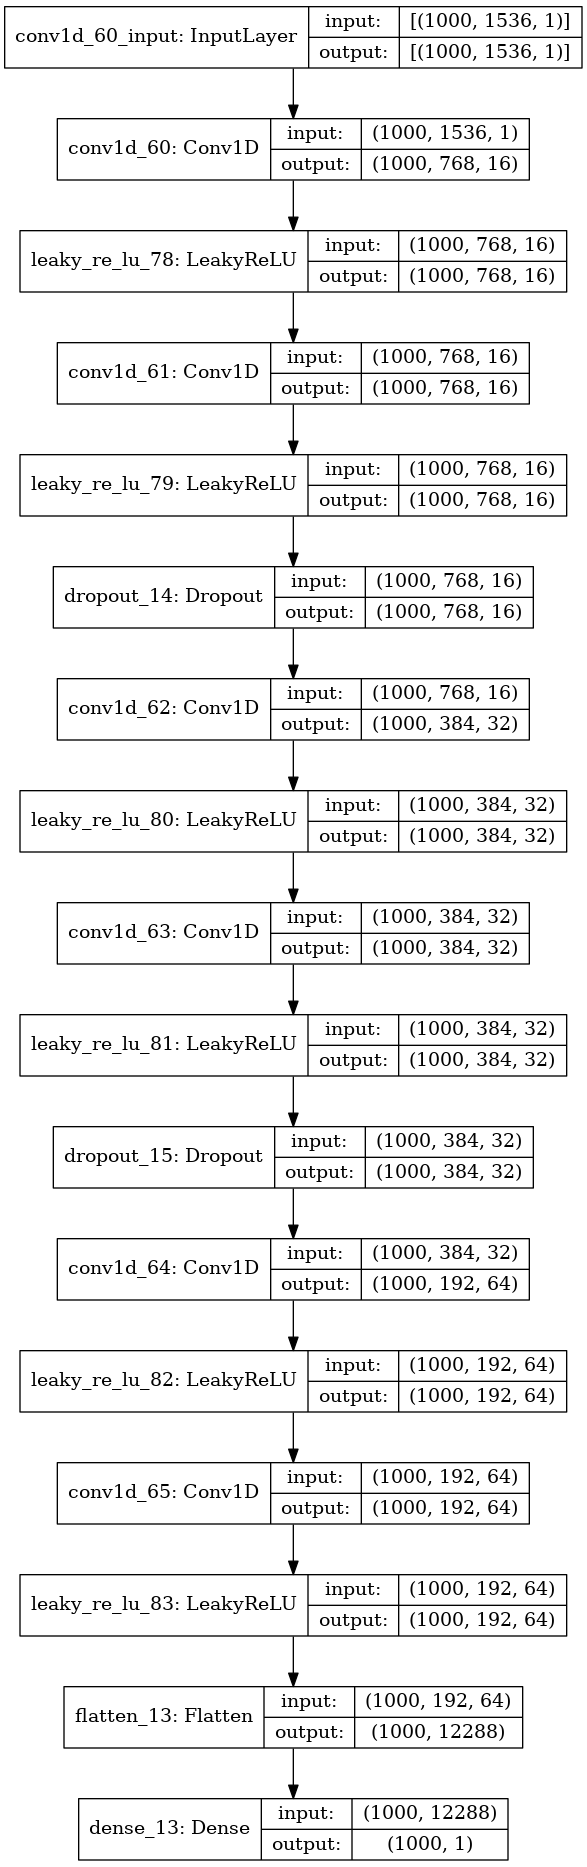

In [65]:
detector = define_detector(n_inputs=n_inputs,batch_size=int(batch_size/2))
detector.summary()
plot_model(detector, show_shapes=True, show_layer_names=True)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_transpose_18 (Conv1DT (1000, 1536, 16)          80        
_________________________________________________________________
leaky_re_lu_84 (LeakyReLU)   (1000, 1536, 16)          0         
_________________________________________________________________
conv1d_66 (Conv1D)           (1000, 1536, 16)          784       
_________________________________________________________________
leaky_re_lu_85 (LeakyReLU)   (1000, 1536, 16)          0         
_________________________________________________________________
conv1d_transpose_19 (Conv1DT (1000, 1536, 32)          2080      
_________________________________________________________________
leaky_re_lu_86 (LeakyReLU)   (1000, 1536, 32)          0         
_________________________________________________________________
conv1d_67 (Conv1D)           (1000, 1536, 32)        

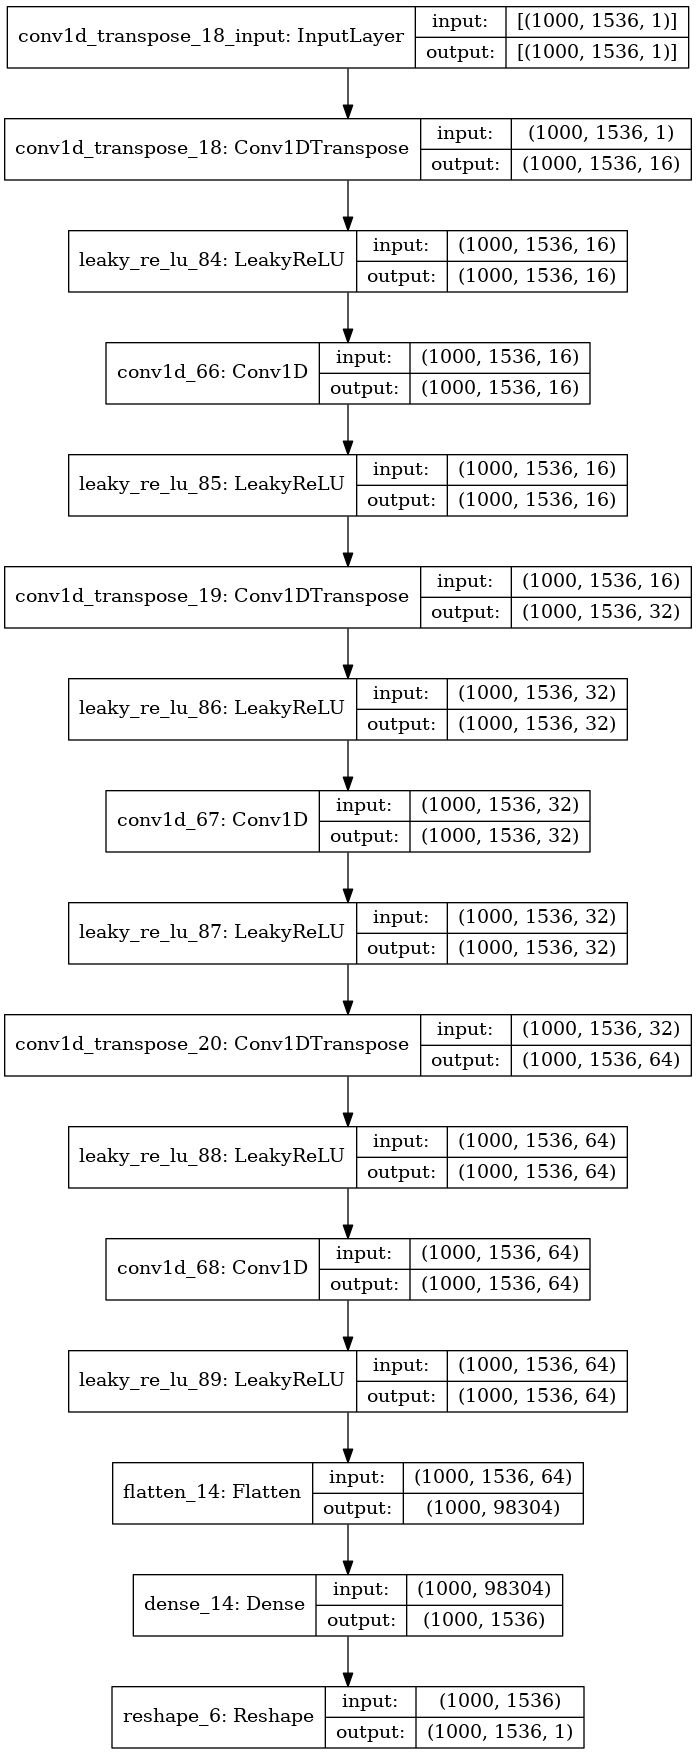

In [66]:
generator = define_generator(n_inputs=n_inputs,latent_dim=latent_dim,batch_size=int(batch_size/2))
generator.summary()
plot_model(generator, show_shapes=True, show_layer_names=True)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_20 (Sequential)   (1000, 1536, 1)           151023136 
_________________________________________________________________
sequential_19 (Sequential)   (1000, 1)                 52273     
Total params: 151,075,409
Trainable params: 151,023,136
Non-trainable params: 52,273
_________________________________________________________________


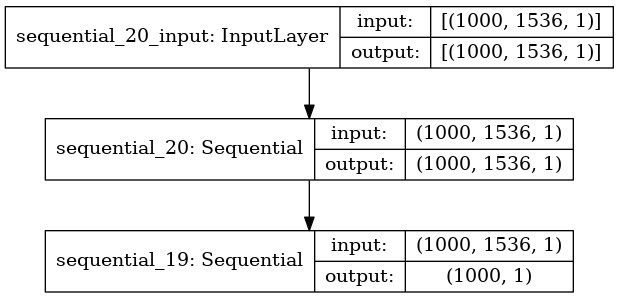

In [67]:
gan = define_gan(generator=generator, detector=detector)
gan.summary()
plot_model(gan, show_shapes=True, show_layer_names=True)

Cell below is used to load in previous models. Changes dependent on desired model.

In [ ]:
generator = keras.models.load_model('practice-training_ID-5.2/generator.h5')
detector = keras.models.load_model('practice-training_ID-5.2/detector.h5')
gan = keras.models.load_model('practice-training_ID-5.2/gan.h5')

Train the models for all `"ee"` auto-correlations of good antennas for night of `2459122`.

In [68]:
train(generator=generator, detector=detector, gan=gan, latent_dim=latent_dim, 
      n_inputs=n_inputs, n_epochs=n_epochs, n_eval=n_eval, batch_size=int(batch_size/2)
      ,ratio=ratio,good_key=good_key_ee,data=data,save_run=save_run, dir_name=dir_name, filepath_to_save=filepath_to_save,
      date_time=date_time, model_comments=model_comments, reference_notes=reference_notes, detector_layout=detector_layout,
      generator_layout=generator_layout, gan_layout=gan_layout, run_num=run_num)

INFO:tensorflow:batch_all_reduce: 14 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 14 all-reduces with algorithm = nccl, num_packs = 1


InternalError: 2 root error(s) found.
  (0) Internal:  NCCL: internal error. Set NCCL_DEBUG=WARN for detail.
	 [[node Adam/NcclAllReduce (defined at <ipython-input-57-1233fb330fb8>:71) ]]
	 [[Adam/Adam/group_deps/NoOp/_51]]
  (1) Internal:  NCCL: internal error. Set NCCL_DEBUG=WARN for detail.
	 [[node Adam/NcclAllReduce (defined at <ipython-input-57-1233fb330fb8>:71) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_19825]

Function call stack:
train_function -> train_function


## 3. Files and keys required for configuring data in Section 1 for GAN training.

Bad antennas for night of `2459122`.

In [15]:
bad_ants = [0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 37, 38, 39, 44, 45, 46, 51, 52, 59, 65, 67, 73, 75, 81, 84, 86, 87, 88, 89, 90, 93, 94, 101, 107, 110, 111, 112, 116, 119, 121, 122, 123, 136, 137, 138, 142, 145, 155, 161, 166, 177, 179, 180, 182, 183, 184, 186, 187]

Save files. Not used after initial file creations.

In [26]:
# with open("bad-ant-keys_2459122.txt", "w") as f:
#     for s in bad_key:
#         f.write(str(s) +",\n")

Load in files and read to list

In [5]:
bad_key = open("good-ant-keys_2459122.txt", "r")
bad_key = bad_key.readlines()
bad_key = [eval(k.replace(',\n','')) for k in bad_key]

In [26]:
bad_key # check if list is formatted properly

[(36, 36, 'ee'),
 (36, 36, 'nn'),
 (50, 50, 'ee'),
 (50, 50, 'nn'),
 (53, 53, 'ee'),
 (53, 53, 'nn'),
 (58, 58, 'ee'),
 (58, 58, 'nn'),
 (66, 66, 'ee'),
 (66, 66, 'nn'),
 (68, 68, 'ee'),
 (68, 68, 'nn'),
 (82, 82, 'ee'),
 (82, 82, 'nn'),
 (83, 83, 'ee'),
 (83, 83, 'nn'),
 (85, 85, 'ee'),
 (85, 85, 'nn'),
 (91, 91, 'ee'),
 (91, 91, 'nn'),
 (92, 92, 'ee'),
 (92, 92, 'nn'),
 (98, 98, 'ee'),
 (98, 98, 'nn'),
 (99, 99, 'ee'),
 (99, 99, 'nn'),
 (100, 100, 'ee'),
 (100, 100, 'nn'),
 (102, 102, 'ee'),
 (102, 102, 'nn'),
 (103, 103, 'ee'),
 (103, 103, 'nn'),
 (104, 104, 'ee'),
 (104, 104, 'nn'),
 (105, 105, 'ee'),
 (105, 105, 'nn'),
 (108, 108, 'ee'),
 (108, 108, 'nn'),
 (109, 109, 'ee'),
 (109, 109, 'nn'),
 (117, 117, 'ee'),
 (117, 117, 'nn'),
 (118, 118, 'ee'),
 (118, 118, 'nn'),
 (120, 120, 'ee'),
 (120, 120, 'nn'),
 (124, 124, 'ee'),
 (124, 124, 'nn'),
 (127, 127, 'ee'),
 (127, 127, 'nn'),
 (128, 128, 'ee'),
 (128, 128, 'nn'),
 (129, 129, 'ee'),
 (129, 129, 'nn'),
 (130, 130, 'ee'),
 (130, 

Files associated to auto-correlations from night of `24591221.`

In [8]:
filename = ['zen.2459122.25108.sum.autos.uvh5','zen.2459122.45934.sum.autos.uvh5',
'zen.2459122.25131.sum.autos.uvh5','zen.2459122.45957.sum.autos.uvh5',
'zen.2459122.25153.sum.autos.uvh5','zen.2459122.45979.sum.autos.uvh5',
'zen.2459122.25175.sum.autos.uvh5','zen.2459122.46002.sum.autos.uvh5',
'zen.2459122.25198.sum.autos.uvh5','zen.2459122.46024.sum.autos.uvh5',
'zen.2459122.25220.sum.autos.uvh5','zen.2459122.46046.sum.autos.uvh5',
'zen.2459122.25243.sum.autos.uvh5','zen.2459122.46069.sum.autos.uvh5',
'zen.2459122.25265.sum.autos.uvh5','zen.2459122.46091.sum.autos.uvh5',
'zen.2459122.25287.sum.autos.uvh5','zen.2459122.46113.sum.autos.uvh5',
'zen.2459122.25310.sum.autos.uvh5','zen.2459122.46136.sum.autos.uvh5',
'zen.2459122.25332.sum.autos.uvh5','zen.2459122.46158.sum.autos.uvh5',
'zen.2459122.25354.sum.autos.uvh5','zen.2459122.46181.sum.autos.uvh5',
'zen.2459122.25377.sum.autos.uvh5','zen.2459122.46203.sum.autos.uvh5',
'zen.2459122.25399.sum.autos.uvh5','zen.2459122.46225.sum.autos.uvh5',
'zen.2459122.25422.sum.autos.uvh5','zen.2459122.46248.sum.autos.uvh5',
'zen.2459122.25444.sum.autos.uvh5','zen.2459122.46270.sum.autos.uvh5',
'zen.2459122.25466.sum.autos.uvh5','zen.2459122.46292.sum.autos.uvh5',
'zen.2459122.25489.sum.autos.uvh5','zen.2459122.46315.sum.autos.uvh5',
'zen.2459122.25511.sum.autos.uvh5','zen.2459122.46337.sum.autos.uvh5',
'zen.2459122.25533.sum.autos.uvh5','zen.2459122.46360.sum.autos.uvh5',
'zen.2459122.25556.sum.autos.uvh5','zen.2459122.46382.sum.autos.uvh5',
'zen.2459122.25578.sum.autos.uvh5','zen.2459122.46404.sum.autos.uvh5',
'zen.2459122.25601.sum.autos.uvh5','zen.2459122.46427.sum.autos.uvh5',
'zen.2459122.25623.sum.autos.uvh5','zen.2459122.46449.sum.autos.uvh5',
'zen.2459122.25645.sum.autos.uvh5','zen.2459122.46471.sum.autos.uvh5',
'zen.2459122.25668.sum.autos.uvh5','zen.2459122.46494.sum.autos.uvh5',
'zen.2459122.25690.sum.autos.uvh5','zen.2459122.46516.sum.autos.uvh5',
'zen.2459122.25712.sum.autos.uvh5','zen.2459122.46538.sum.autos.uvh5',
'zen.2459122.25735.sum.autos.uvh5','zen.2459122.46561.sum.autos.uvh5',
'zen.2459122.25757.sum.autos.uvh5','zen.2459122.46583.sum.autos.uvh5',
'zen.2459122.25779.sum.autos.uvh5','zen.2459122.46606.sum.autos.uvh5',
'zen.2459122.25802.sum.autos.uvh5','zen.2459122.46628.sum.autos.uvh5',
'zen.2459122.25824.sum.autos.uvh5','zen.2459122.46650.sum.autos.uvh5',
'zen.2459122.25847.sum.autos.uvh5','zen.2459122.46673.sum.autos.uvh5',
'zen.2459122.25869.sum.autos.uvh5','zen.2459122.46695.sum.autos.uvh5',
'zen.2459122.25891.sum.autos.uvh5','zen.2459122.46717.sum.autos.uvh5',
'zen.2459122.25914.sum.autos.uvh5','zen.2459122.46740.sum.autos.uvh5',
'zen.2459122.25936.sum.autos.uvh5','zen.2459122.46762.sum.autos.uvh5',
'zen.2459122.25958.sum.autos.uvh5','zen.2459122.46785.sum.autos.uvh5',
'zen.2459122.25981.sum.autos.uvh5','zen.2459122.46807.sum.autos.uvh5',
'zen.2459122.26003.sum.autos.uvh5','zen.2459122.46829.sum.autos.uvh5',
'zen.2459122.26026.sum.autos.uvh5','zen.2459122.46852.sum.autos.uvh5',
'zen.2459122.26048.sum.autos.uvh5','zen.2459122.46874.sum.autos.uvh5',
'zen.2459122.26070.sum.autos.uvh5','zen.2459122.46896.sum.autos.uvh5',
'zen.2459122.26093.sum.autos.uvh5','zen.2459122.46919.sum.autos.uvh5',
'zen.2459122.26115.sum.autos.uvh5','zen.2459122.46941.sum.autos.uvh5',
'zen.2459122.26137.sum.autos.uvh5','zen.2459122.46963.sum.autos.uvh5',
'zen.2459122.26160.sum.autos.uvh5','zen.2459122.46986.sum.autos.uvh5',
'zen.2459122.26182.sum.autos.uvh5','zen.2459122.47008.sum.autos.uvh5',
'zen.2459122.26204.sum.autos.uvh5','zen.2459122.47031.sum.autos.uvh5',
'zen.2459122.26227.sum.autos.uvh5','zen.2459122.47053.sum.autos.uvh5',
'zen.2459122.26249.sum.autos.uvh5','zen.2459122.47075.sum.autos.uvh5',
'zen.2459122.26272.sum.autos.uvh5','zen.2459122.47098.sum.autos.uvh5',
'zen.2459122.26294.sum.autos.uvh5','zen.2459122.47120.sum.autos.uvh5',
'zen.2459122.26316.sum.autos.uvh5','zen.2459122.47142.sum.autos.uvh5',
'zen.2459122.26339.sum.autos.uvh5','zen.2459122.47165.sum.autos.uvh5',
'zen.2459122.26361.sum.autos.uvh5','zen.2459122.47187.sum.autos.uvh5',
'zen.2459122.26383.sum.autos.uvh5','zen.2459122.47210.sum.autos.uvh5',
'zen.2459122.26406.sum.autos.uvh5','zen.2459122.47232.sum.autos.uvh5',
'zen.2459122.26428.sum.autos.uvh5','zen.2459122.47254.sum.autos.uvh5',
'zen.2459122.26451.sum.autos.uvh5','zen.2459122.47277.sum.autos.uvh5',
'zen.2459122.26473.sum.autos.uvh5','zen.2459122.47299.sum.autos.uvh5',
'zen.2459122.26495.sum.autos.uvh5','zen.2459122.47321.sum.autos.uvh5',
'zen.2459122.26518.sum.autos.uvh5','zen.2459122.47344.sum.autos.uvh5',
'zen.2459122.26540.sum.autos.uvh5','zen.2459122.47366.sum.autos.uvh5',
'zen.2459122.26562.sum.autos.uvh5','zen.2459122.47389.sum.autos.uvh5',
'zen.2459122.26585.sum.autos.uvh5','zen.2459122.47411.sum.autos.uvh5',
'zen.2459122.26607.sum.autos.uvh5','zen.2459122.47433.sum.autos.uvh5',
'zen.2459122.26630.sum.autos.uvh5','zen.2459122.47456.sum.autos.uvh5',
'zen.2459122.26652.sum.autos.uvh5','zen.2459122.47478.sum.autos.uvh5',
'zen.2459122.26674.sum.autos.uvh5','zen.2459122.47500.sum.autos.uvh5',
'zen.2459122.26697.sum.autos.uvh5','zen.2459122.47523.sum.autos.uvh5',
'zen.2459122.26719.sum.autos.uvh5','zen.2459122.47545.sum.autos.uvh5',
'zen.2459122.26741.sum.autos.uvh5','zen.2459122.47567.sum.autos.uvh5',
'zen.2459122.26764.sum.autos.uvh5','zen.2459122.47590.sum.autos.uvh5',
'zen.2459122.26786.sum.autos.uvh5','zen.2459122.47612.sum.autos.uvh5',
'zen.2459122.26808.sum.autos.uvh5','zen.2459122.47635.sum.autos.uvh5',
'zen.2459122.26831.sum.autos.uvh5','zen.2459122.47657.sum.autos.uvh5',
'zen.2459122.26853.sum.autos.uvh5','zen.2459122.47679.sum.autos.uvh5',
'zen.2459122.26876.sum.autos.uvh5','zen.2459122.47702.sum.autos.uvh5',
'zen.2459122.26898.sum.autos.uvh5','zen.2459122.47724.sum.autos.uvh5',
'zen.2459122.26920.sum.autos.uvh5','zen.2459122.47746.sum.autos.uvh5',
'zen.2459122.26943.sum.autos.uvh5','zen.2459122.47769.sum.autos.uvh5',
'zen.2459122.26965.sum.autos.uvh5','zen.2459122.47791.sum.autos.uvh5',
'zen.2459122.26987.sum.autos.uvh5','zen.2459122.47814.sum.autos.uvh5',
'zen.2459122.27010.sum.autos.uvh5','zen.2459122.47836.sum.autos.uvh5',
'zen.2459122.27032.sum.autos.uvh5','zen.2459122.47858.sum.autos.uvh5',
'zen.2459122.27055.sum.autos.uvh5','zen.2459122.47881.sum.autos.uvh5',
'zen.2459122.27077.sum.autos.uvh5','zen.2459122.47903.sum.autos.uvh5',
'zen.2459122.27099.sum.autos.uvh5','zen.2459122.47925.sum.autos.uvh5',
'zen.2459122.27122.sum.autos.uvh5','zen.2459122.47948.sum.autos.uvh5',
'zen.2459122.27144.sum.autos.uvh5','zen.2459122.47970.sum.autos.uvh5',
'zen.2459122.27166.sum.autos.uvh5','zen.2459122.47992.sum.autos.uvh5',
'zen.2459122.27189.sum.autos.uvh5','zen.2459122.48015.sum.autos.uvh5',
'zen.2459122.27211.sum.autos.uvh5','zen.2459122.48037.sum.autos.uvh5',
'zen.2459122.27233.sum.autos.uvh5','zen.2459122.48060.sum.autos.uvh5',
'zen.2459122.27256.sum.autos.uvh5','zen.2459122.48082.sum.autos.uvh5',
'zen.2459122.27278.sum.autos.uvh5','zen.2459122.48104.sum.autos.uvh5',
'zen.2459122.27301.sum.autos.uvh5','zen.2459122.48127.sum.autos.uvh5',
'zen.2459122.27323.sum.autos.uvh5','zen.2459122.48149.sum.autos.uvh5',
'zen.2459122.27345.sum.autos.uvh5','zen.2459122.48171.sum.autos.uvh5',
'zen.2459122.27368.sum.autos.uvh5','zen.2459122.48194.sum.autos.uvh5',
'zen.2459122.27390.sum.autos.uvh5','zen.2459122.48216.sum.autos.uvh5',
'zen.2459122.27412.sum.autos.uvh5','zen.2459122.48239.sum.autos.uvh5',
'zen.2459122.27435.sum.autos.uvh5','zen.2459122.48261.sum.autos.uvh5',
'zen.2459122.27457.sum.autos.uvh5','zen.2459122.48283.sum.autos.uvh5',
'zen.2459122.27480.sum.autos.uvh5','zen.2459122.48306.sum.autos.uvh5',
'zen.2459122.27502.sum.autos.uvh5','zen.2459122.48328.sum.autos.uvh5',
'zen.2459122.27524.sum.autos.uvh5','zen.2459122.48350.sum.autos.uvh5',
'zen.2459122.27547.sum.autos.uvh5','zen.2459122.48373.sum.autos.uvh5',
'zen.2459122.27569.sum.autos.uvh5','zen.2459122.48395.sum.autos.uvh5',
'zen.2459122.27591.sum.autos.uvh5','zen.2459122.48418.sum.autos.uvh5',
'zen.2459122.27614.sum.autos.uvh5','zen.2459122.48440.sum.autos.uvh5',
'zen.2459122.27636.sum.autos.uvh5','zen.2459122.48462.sum.autos.uvh5',
'zen.2459122.27659.sum.autos.uvh5','zen.2459122.48485.sum.autos.uvh5',
'zen.2459122.27681.sum.autos.uvh5','zen.2459122.48507.sum.autos.uvh5',
'zen.2459122.27703.sum.autos.uvh5','zen.2459122.48529.sum.autos.uvh5',
'zen.2459122.27726.sum.autos.uvh5','zen.2459122.48552.sum.autos.uvh5',
'zen.2459122.27748.sum.autos.uvh5','zen.2459122.48574.sum.autos.uvh5',
'zen.2459122.27770.sum.autos.uvh5','zen.2459122.48596.sum.autos.uvh5',
'zen.2459122.27793.sum.autos.uvh5','zen.2459122.48619.sum.autos.uvh5',
'zen.2459122.27815.sum.autos.uvh5','zen.2459122.48641.sum.autos.uvh5',
'zen.2459122.27837.sum.autos.uvh5','zen.2459122.48664.sum.autos.uvh5',
'zen.2459122.27860.sum.autos.uvh5','zen.2459122.48686.sum.autos.uvh5',
'zen.2459122.27882.sum.autos.uvh5','zen.2459122.48708.sum.autos.uvh5',
'zen.2459122.27905.sum.autos.uvh5','zen.2459122.48731.sum.autos.uvh5',
'zen.2459122.27927.sum.autos.uvh5','zen.2459122.48753.sum.autos.uvh5',
'zen.2459122.27949.sum.autos.uvh5','zen.2459122.48775.sum.autos.uvh5',
'zen.2459122.27972.sum.autos.uvh5','zen.2459122.48798.sum.autos.uvh5',
'zen.2459122.27994.sum.autos.uvh5','zen.2459122.48820.sum.autos.uvh5',
'zen.2459122.28016.sum.autos.uvh5','zen.2459122.48843.sum.autos.uvh5',
'zen.2459122.28039.sum.autos.uvh5','zen.2459122.48865.sum.autos.uvh5',
'zen.2459122.28061.sum.autos.uvh5','zen.2459122.48887.sum.autos.uvh5',
'zen.2459122.28084.sum.autos.uvh5','zen.2459122.48910.sum.autos.uvh5',
'zen.2459122.28106.sum.autos.uvh5','zen.2459122.48932.sum.autos.uvh5',
'zen.2459122.28128.sum.autos.uvh5','zen.2459122.48954.sum.autos.uvh5',
'zen.2459122.28151.sum.autos.uvh5','zen.2459122.48977.sum.autos.uvh5',
'zen.2459122.28173.sum.autos.uvh5','zen.2459122.48999.sum.autos.uvh5',
'zen.2459122.28195.sum.autos.uvh5','zen.2459122.49022.sum.autos.uvh5',
'zen.2459122.28218.sum.autos.uvh5','zen.2459122.49044.sum.autos.uvh5',
'zen.2459122.28240.sum.autos.uvh5','zen.2459122.49066.sum.autos.uvh5',
'zen.2459122.28262.sum.autos.uvh5','zen.2459122.49089.sum.autos.uvh5',
'zen.2459122.28285.sum.autos.uvh5','zen.2459122.49111.sum.autos.uvh5',
'zen.2459122.28307.sum.autos.uvh5','zen.2459122.49133.sum.autos.uvh5',
'zen.2459122.28330.sum.autos.uvh5','zen.2459122.49156.sum.autos.uvh5',
'zen.2459122.28352.sum.autos.uvh5','zen.2459122.49178.sum.autos.uvh5',
'zen.2459122.28374.sum.autos.uvh5','zen.2459122.49200.sum.autos.uvh5',
'zen.2459122.28397.sum.autos.uvh5','zen.2459122.49223.sum.autos.uvh5',
'zen.2459122.28419.sum.autos.uvh5','zen.2459122.49245.sum.autos.uvh5',
'zen.2459122.28441.sum.autos.uvh5','zen.2459122.49268.sum.autos.uvh5',
'zen.2459122.28464.sum.autos.uvh5','zen.2459122.49290.sum.autos.uvh5',
'zen.2459122.28486.sum.autos.uvh5','zen.2459122.49312.sum.autos.uvh5',
'zen.2459122.28509.sum.autos.uvh5','zen.2459122.49335.sum.autos.uvh5',
'zen.2459122.28531.sum.autos.uvh5','zen.2459122.49357.sum.autos.uvh5',
'zen.2459122.28553.sum.autos.uvh5','zen.2459122.49379.sum.autos.uvh5',
'zen.2459122.28576.sum.autos.uvh5','zen.2459122.49402.sum.autos.uvh5',
'zen.2459122.28598.sum.autos.uvh5','zen.2459122.49424.sum.autos.uvh5',
'zen.2459122.28620.sum.autos.uvh5','zen.2459122.49447.sum.autos.uvh5',
'zen.2459122.28643.sum.autos.uvh5','zen.2459122.49469.sum.autos.uvh5',
'zen.2459122.28665.sum.autos.uvh5','zen.2459122.49491.sum.autos.uvh5',
'zen.2459122.28688.sum.autos.uvh5','zen.2459122.49514.sum.autos.uvh5',
'zen.2459122.28710.sum.autos.uvh5','zen.2459122.49536.sum.autos.uvh5',
'zen.2459122.28732.sum.autos.uvh5','zen.2459122.49558.sum.autos.uvh5',
'zen.2459122.28755.sum.autos.uvh5','zen.2459122.49581.sum.autos.uvh5',
'zen.2459122.28777.sum.autos.uvh5','zen.2459122.49603.sum.autos.uvh5',
'zen.2459122.28799.sum.autos.uvh5','zen.2459122.49625.sum.autos.uvh5',
'zen.2459122.28822.sum.autos.uvh5','zen.2459122.49648.sum.autos.uvh5',
'zen.2459122.28844.sum.autos.uvh5','zen.2459122.49670.sum.autos.uvh5',
'zen.2459122.28866.sum.autos.uvh5','zen.2459122.49693.sum.autos.uvh5',
'zen.2459122.28889.sum.autos.uvh5','zen.2459122.49715.sum.autos.uvh5',
'zen.2459122.28911.sum.autos.uvh5','zen.2459122.49737.sum.autos.uvh5',
'zen.2459122.28934.sum.autos.uvh5','zen.2459122.49760.sum.autos.uvh5',
'zen.2459122.28956.sum.autos.uvh5','zen.2459122.49782.sum.autos.uvh5',
'zen.2459122.28978.sum.autos.uvh5','zen.2459122.49804.sum.autos.uvh5',
'zen.2459122.29001.sum.autos.uvh5','zen.2459122.49827.sum.autos.uvh5',
'zen.2459122.29023.sum.autos.uvh5','zen.2459122.49849.sum.autos.uvh5',
'zen.2459122.29045.sum.autos.uvh5','zen.2459122.49872.sum.autos.uvh5',
'zen.2459122.29068.sum.autos.uvh5','zen.2459122.49894.sum.autos.uvh5',
'zen.2459122.29090.sum.autos.uvh5','zen.2459122.49916.sum.autos.uvh5',
'zen.2459122.29113.sum.autos.uvh5','zen.2459122.49939.sum.autos.uvh5',
'zen.2459122.29135.sum.autos.uvh5','zen.2459122.49961.sum.autos.uvh5',
'zen.2459122.29157.sum.autos.uvh5','zen.2459122.49983.sum.autos.uvh5',
'zen.2459122.29180.sum.autos.uvh5','zen.2459122.50006.sum.autos.uvh5',
'zen.2459122.29202.sum.autos.uvh5','zen.2459122.50028.sum.autos.uvh5',
'zen.2459122.29224.sum.autos.uvh5','zen.2459122.50051.sum.autos.uvh5',
'zen.2459122.29247.sum.autos.uvh5','zen.2459122.50073.sum.autos.uvh5',
'zen.2459122.29269.sum.autos.uvh5','zen.2459122.50095.sum.autos.uvh5',
'zen.2459122.29291.sum.autos.uvh5','zen.2459122.50118.sum.autos.uvh5',
'zen.2459122.29314.sum.autos.uvh5','zen.2459122.50140.sum.autos.uvh5',
'zen.2459122.29336.sum.autos.uvh5','zen.2459122.50162.sum.autos.uvh5',
'zen.2459122.29359.sum.autos.uvh5','zen.2459122.50185.sum.autos.uvh5',
'zen.2459122.29381.sum.autos.uvh5','zen.2459122.50207.sum.autos.uvh5',
'zen.2459122.29403.sum.autos.uvh5','zen.2459122.50229.sum.autos.uvh5',
'zen.2459122.29426.sum.autos.uvh5','zen.2459122.50252.sum.autos.uvh5',
'zen.2459122.29448.sum.autos.uvh5','zen.2459122.50274.sum.autos.uvh5',
'zen.2459122.29470.sum.autos.uvh5','zen.2459122.50297.sum.autos.uvh5',
'zen.2459122.29493.sum.autos.uvh5','zen.2459122.50319.sum.autos.uvh5',
'zen.2459122.29515.sum.autos.uvh5','zen.2459122.50341.sum.autos.uvh5',
'zen.2459122.29538.sum.autos.uvh5','zen.2459122.50364.sum.autos.uvh5',
'zen.2459122.29560.sum.autos.uvh5','zen.2459122.50386.sum.autos.uvh5',
'zen.2459122.29582.sum.autos.uvh5','zen.2459122.50408.sum.autos.uvh5',
'zen.2459122.29605.sum.autos.uvh5','zen.2459122.50431.sum.autos.uvh5',
'zen.2459122.29627.sum.autos.uvh5','zen.2459122.50453.sum.autos.uvh5',
'zen.2459122.29649.sum.autos.uvh5','zen.2459122.50476.sum.autos.uvh5',
'zen.2459122.29672.sum.autos.uvh5','zen.2459122.50498.sum.autos.uvh5',
'zen.2459122.29694.sum.autos.uvh5','zen.2459122.50520.sum.autos.uvh5',
'zen.2459122.29717.sum.autos.uvh5','zen.2459122.50543.sum.autos.uvh5',
'zen.2459122.29739.sum.autos.uvh5','zen.2459122.50565.sum.autos.uvh5',
'zen.2459122.29761.sum.autos.uvh5','zen.2459122.50587.sum.autos.uvh5',
'zen.2459122.29784.sum.autos.uvh5','zen.2459122.50610.sum.autos.uvh5',
'zen.2459122.29806.sum.autos.uvh5','zen.2459122.50632.sum.autos.uvh5',
'zen.2459122.29828.sum.autos.uvh5','zen.2459122.50654.sum.autos.uvh5',
'zen.2459122.29851.sum.autos.uvh5','zen.2459122.50677.sum.autos.uvh5',
'zen.2459122.29873.sum.autos.uvh5','zen.2459122.50699.sum.autos.uvh5',
'zen.2459122.29895.sum.autos.uvh5','zen.2459122.50722.sum.autos.uvh5',
'zen.2459122.29918.sum.autos.uvh5','zen.2459122.50744.sum.autos.uvh5',
'zen.2459122.29940.sum.autos.uvh5','zen.2459122.50766.sum.autos.uvh5',
'zen.2459122.29963.sum.autos.uvh5','zen.2459122.50789.sum.autos.uvh5',
'zen.2459122.29985.sum.autos.uvh5','zen.2459122.50811.sum.autos.uvh5',
'zen.2459122.30007.sum.autos.uvh5','zen.2459122.50833.sum.autos.uvh5',
'zen.2459122.30030.sum.autos.uvh5','zen.2459122.50856.sum.autos.uvh5',
'zen.2459122.30052.sum.autos.uvh5','zen.2459122.50878.sum.autos.uvh5',
'zen.2459122.30074.sum.autos.uvh5','zen.2459122.50901.sum.autos.uvh5',
'zen.2459122.30097.sum.autos.uvh5','zen.2459122.50923.sum.autos.uvh5',
'zen.2459122.30119.sum.autos.uvh5','zen.2459122.50945.sum.autos.uvh5',
'zen.2459122.30142.sum.autos.uvh5','zen.2459122.50968.sum.autos.uvh5',
'zen.2459122.30164.sum.autos.uvh5','zen.2459122.50990.sum.autos.uvh5',
'zen.2459122.30186.sum.autos.uvh5','zen.2459122.51012.sum.autos.uvh5',
'zen.2459122.30209.sum.autos.uvh5','zen.2459122.51035.sum.autos.uvh5',
'zen.2459122.30231.sum.autos.uvh5','zen.2459122.51057.sum.autos.uvh5',
'zen.2459122.30253.sum.autos.uvh5','zen.2459122.51080.sum.autos.uvh5',
'zen.2459122.30276.sum.autos.uvh5','zen.2459122.51102.sum.autos.uvh5',
'zen.2459122.30298.sum.autos.uvh5','zen.2459122.51124.sum.autos.uvh5',
'zen.2459122.30320.sum.autos.uvh5','zen.2459122.51147.sum.autos.uvh5',
'zen.2459122.30343.sum.autos.uvh5','zen.2459122.51169.sum.autos.uvh5',
'zen.2459122.30365.sum.autos.uvh5','zen.2459122.51191.sum.autos.uvh5',
'zen.2459122.30388.sum.autos.uvh5','zen.2459122.51214.sum.autos.uvh5',
'zen.2459122.30410.sum.autos.uvh5','zen.2459122.51236.sum.autos.uvh5',
'zen.2459122.30432.sum.autos.uvh5','zen.2459122.51258.sum.autos.uvh5',
'zen.2459122.30455.sum.autos.uvh5','zen.2459122.51281.sum.autos.uvh5',
'zen.2459122.30477.sum.autos.uvh5','zen.2459122.51303.sum.autos.uvh5',
'zen.2459122.30499.sum.autos.uvh5','zen.2459122.51326.sum.autos.uvh5',
'zen.2459122.30522.sum.autos.uvh5','zen.2459122.51348.sum.autos.uvh5',
'zen.2459122.30544.sum.autos.uvh5','zen.2459122.51370.sum.autos.uvh5',
'zen.2459122.30567.sum.autos.uvh5','zen.2459122.51393.sum.autos.uvh5',
'zen.2459122.30589.sum.autos.uvh5','zen.2459122.51415.sum.autos.uvh5',
'zen.2459122.30611.sum.autos.uvh5','zen.2459122.51437.sum.autos.uvh5',
'zen.2459122.30634.sum.autos.uvh5','zen.2459122.51460.sum.autos.uvh5',
'zen.2459122.30656.sum.autos.uvh5','zen.2459122.51482.sum.autos.uvh5',
'zen.2459122.30678.sum.autos.uvh5','zen.2459122.51505.sum.autos.uvh5',
'zen.2459122.30701.sum.autos.uvh5','zen.2459122.51527.sum.autos.uvh5',
'zen.2459122.30723.sum.autos.uvh5','zen.2459122.51549.sum.autos.uvh5',
'zen.2459122.30746.sum.autos.uvh5','zen.2459122.51572.sum.autos.uvh5',
'zen.2459122.30768.sum.autos.uvh5','zen.2459122.51594.sum.autos.uvh5',
'zen.2459122.30790.sum.autos.uvh5','zen.2459122.51616.sum.autos.uvh5',
'zen.2459122.30813.sum.autos.uvh5','zen.2459122.51639.sum.autos.uvh5',
'zen.2459122.30835.sum.autos.uvh5','zen.2459122.51661.sum.autos.uvh5',
'zen.2459122.30857.sum.autos.uvh5','zen.2459122.51683.sum.autos.uvh5',
'zen.2459122.30880.sum.autos.uvh5','zen.2459122.51706.sum.autos.uvh5',
'zen.2459122.30902.sum.autos.uvh5','zen.2459122.51728.sum.autos.uvh5',
'zen.2459122.30924.sum.autos.uvh5','zen.2459122.51751.sum.autos.uvh5',
'zen.2459122.30947.sum.autos.uvh5','zen.2459122.51773.sum.autos.uvh5',
'zen.2459122.30969.sum.autos.uvh5','zen.2459122.51795.sum.autos.uvh5',
'zen.2459122.30992.sum.autos.uvh5','zen.2459122.51818.sum.autos.uvh5',
'zen.2459122.31014.sum.autos.uvh5','zen.2459122.51840.sum.autos.uvh5',
'zen.2459122.31036.sum.autos.uvh5','zen.2459122.51862.sum.autos.uvh5',
'zen.2459122.31059.sum.autos.uvh5','zen.2459122.51885.sum.autos.uvh5',
'zen.2459122.31081.sum.autos.uvh5','zen.2459122.51907.sum.autos.uvh5',
'zen.2459122.31103.sum.autos.uvh5','zen.2459122.51930.sum.autos.uvh5',
'zen.2459122.31126.sum.autos.uvh5','zen.2459122.51952.sum.autos.uvh5',
'zen.2459122.31148.sum.autos.uvh5','zen.2459122.51974.sum.autos.uvh5',
'zen.2459122.31171.sum.autos.uvh5','zen.2459122.51997.sum.autos.uvh5',
'zen.2459122.31193.sum.autos.uvh5','zen.2459122.52019.sum.autos.uvh5',
'zen.2459122.31215.sum.autos.uvh5','zen.2459122.52041.sum.autos.uvh5',
'zen.2459122.31238.sum.autos.uvh5','zen.2459122.52064.sum.autos.uvh5',
'zen.2459122.31260.sum.autos.uvh5','zen.2459122.52086.sum.autos.uvh5',
'zen.2459122.31282.sum.autos.uvh5','zen.2459122.52109.sum.autos.uvh5',
'zen.2459122.31305.sum.autos.uvh5','zen.2459122.52131.sum.autos.uvh5',
'zen.2459122.31327.sum.autos.uvh5','zen.2459122.52153.sum.autos.uvh5',
'zen.2459122.31350.sum.autos.uvh5','zen.2459122.52176.sum.autos.uvh5',
'zen.2459122.31372.sum.autos.uvh5','zen.2459122.52198.sum.autos.uvh5',
'zen.2459122.31394.sum.autos.uvh5','zen.2459122.52220.sum.autos.uvh5',
'zen.2459122.31417.sum.autos.uvh5','zen.2459122.52243.sum.autos.uvh5',
'zen.2459122.31439.sum.autos.uvh5','zen.2459122.52265.sum.autos.uvh5',
'zen.2459122.31461.sum.autos.uvh5','zen.2459122.52287.sum.autos.uvh5',
'zen.2459122.31484.sum.autos.uvh5','zen.2459122.52310.sum.autos.uvh5',
'zen.2459122.31506.sum.autos.uvh5','zen.2459122.52332.sum.autos.uvh5',
'zen.2459122.31528.sum.autos.uvh5','zen.2459122.52355.sum.autos.uvh5',
'zen.2459122.31551.sum.autos.uvh5','zen.2459122.52377.sum.autos.uvh5',
'zen.2459122.31573.sum.autos.uvh5','zen.2459122.52399.sum.autos.uvh5',
'zen.2459122.31596.sum.autos.uvh5','zen.2459122.52422.sum.autos.uvh5',
'zen.2459122.31618.sum.autos.uvh5','zen.2459122.52444.sum.autos.uvh5',
'zen.2459122.31640.sum.autos.uvh5','zen.2459122.52466.sum.autos.uvh5',
'zen.2459122.31663.sum.autos.uvh5','zen.2459122.52489.sum.autos.uvh5',
'zen.2459122.31685.sum.autos.uvh5','zen.2459122.52511.sum.autos.uvh5',
'zen.2459122.31707.sum.autos.uvh5','zen.2459122.52534.sum.autos.uvh5',
'zen.2459122.31730.sum.autos.uvh5','zen.2459122.52556.sum.autos.uvh5',
'zen.2459122.31752.sum.autos.uvh5','zen.2459122.52578.sum.autos.uvh5',
'zen.2459122.31775.sum.autos.uvh5','zen.2459122.52601.sum.autos.uvh5',
'zen.2459122.31797.sum.autos.uvh5','zen.2459122.52623.sum.autos.uvh5',
'zen.2459122.31819.sum.autos.uvh5','zen.2459122.52645.sum.autos.uvh5',
'zen.2459122.31842.sum.autos.uvh5','zen.2459122.52668.sum.autos.uvh5',
'zen.2459122.31864.sum.autos.uvh5','zen.2459122.52690.sum.autos.uvh5',
'zen.2459122.31886.sum.autos.uvh5','zen.2459122.52712.sum.autos.uvh5',
'zen.2459122.31909.sum.autos.uvh5','zen.2459122.52735.sum.autos.uvh5',
'zen.2459122.31931.sum.autos.uvh5','zen.2459122.52757.sum.autos.uvh5',
'zen.2459122.31953.sum.autos.uvh5','zen.2459122.52780.sum.autos.uvh5',
'zen.2459122.31976.sum.autos.uvh5','zen.2459122.52802.sum.autos.uvh5',
'zen.2459122.31998.sum.autos.uvh5','zen.2459122.52824.sum.autos.uvh5',
'zen.2459122.32021.sum.autos.uvh5','zen.2459122.52847.sum.autos.uvh5',
'zen.2459122.32043.sum.autos.uvh5','zen.2459122.52869.sum.autos.uvh5',
'zen.2459122.32065.sum.autos.uvh5','zen.2459122.52891.sum.autos.uvh5',
'zen.2459122.32088.sum.autos.uvh5','zen.2459122.52914.sum.autos.uvh5',
'zen.2459122.32110.sum.autos.uvh5','zen.2459122.52936.sum.autos.uvh5',
'zen.2459122.32132.sum.autos.uvh5','zen.2459122.52959.sum.autos.uvh5',
'zen.2459122.32155.sum.autos.uvh5','zen.2459122.52981.sum.autos.uvh5',
'zen.2459122.32177.sum.autos.uvh5','zen.2459122.53003.sum.autos.uvh5',
'zen.2459122.32200.sum.autos.uvh5','zen.2459122.53026.sum.autos.uvh5',
'zen.2459122.32222.sum.autos.uvh5','zen.2459122.53048.sum.autos.uvh5',
'zen.2459122.32244.sum.autos.uvh5','zen.2459122.53070.sum.autos.uvh5',
'zen.2459122.32267.sum.autos.uvh5','zen.2459122.53093.sum.autos.uvh5',
'zen.2459122.32289.sum.autos.uvh5','zen.2459122.53115.sum.autos.uvh5',
'zen.2459122.32311.sum.autos.uvh5','zen.2459122.53138.sum.autos.uvh5',
'zen.2459122.32334.sum.autos.uvh5','zen.2459122.53160.sum.autos.uvh5',
'zen.2459122.32356.sum.autos.uvh5','zen.2459122.53182.sum.autos.uvh5',
'zen.2459122.32379.sum.autos.uvh5','zen.2459122.53205.sum.autos.uvh5',
'zen.2459122.32401.sum.autos.uvh5','zen.2459122.53227.sum.autos.uvh5',
'zen.2459122.32423.sum.autos.uvh5','zen.2459122.53249.sum.autos.uvh5',
'zen.2459122.32446.sum.autos.uvh5','zen.2459122.53272.sum.autos.uvh5',
'zen.2459122.32468.sum.autos.uvh5','zen.2459122.53294.sum.autos.uvh5',
'zen.2459122.32490.sum.autos.uvh5','zen.2459122.53316.sum.autos.uvh5',
'zen.2459122.32513.sum.autos.uvh5','zen.2459122.53339.sum.autos.uvh5',
'zen.2459122.32535.sum.autos.uvh5','zen.2459122.53361.sum.autos.uvh5',
'zen.2459122.32557.sum.autos.uvh5','zen.2459122.53384.sum.autos.uvh5',
'zen.2459122.32580.sum.autos.uvh5','zen.2459122.53406.sum.autos.uvh5',
'zen.2459122.32602.sum.autos.uvh5','zen.2459122.53428.sum.autos.uvh5',
'zen.2459122.32625.sum.autos.uvh5','zen.2459122.53451.sum.autos.uvh5',
'zen.2459122.32647.sum.autos.uvh5','zen.2459122.53473.sum.autos.uvh5',
'zen.2459122.32669.sum.autos.uvh5','zen.2459122.53495.sum.autos.uvh5',
'zen.2459122.32692.sum.autos.uvh5','zen.2459122.53518.sum.autos.uvh5',
'zen.2459122.32714.sum.autos.uvh5','zen.2459122.53540.sum.autos.uvh5',
'zen.2459122.32736.sum.autos.uvh5','zen.2459122.53563.sum.autos.uvh5',
'zen.2459122.32759.sum.autos.uvh5','zen.2459122.53585.sum.autos.uvh5',
'zen.2459122.32781.sum.autos.uvh5','zen.2459122.53607.sum.autos.uvh5',
'zen.2459122.32804.sum.autos.uvh5','zen.2459122.53630.sum.autos.uvh5',
'zen.2459122.32826.sum.autos.uvh5','zen.2459122.53652.sum.autos.uvh5',
'zen.2459122.32848.sum.autos.uvh5','zen.2459122.53674.sum.autos.uvh5',
'zen.2459122.32871.sum.autos.uvh5','zen.2459122.53697.sum.autos.uvh5',
'zen.2459122.32893.sum.autos.uvh5','zen.2459122.53719.sum.autos.uvh5',
'zen.2459122.32915.sum.autos.uvh5','zen.2459122.53741.sum.autos.uvh5',
'zen.2459122.32938.sum.autos.uvh5','zen.2459122.53764.sum.autos.uvh5',
'zen.2459122.32960.sum.autos.uvh5','zen.2459122.53786.sum.autos.uvh5',
'zen.2459122.32982.sum.autos.uvh5','zen.2459122.53809.sum.autos.uvh5',
'zen.2459122.33005.sum.autos.uvh5','zen.2459122.53831.sum.autos.uvh5',
'zen.2459122.33027.sum.autos.uvh5','zen.2459122.53853.sum.autos.uvh5',
'zen.2459122.33050.sum.autos.uvh5','zen.2459122.53876.sum.autos.uvh5',
'zen.2459122.33072.sum.autos.uvh5','zen.2459122.53898.sum.autos.uvh5',
'zen.2459122.33094.sum.autos.uvh5','zen.2459122.53920.sum.autos.uvh5',
'zen.2459122.33117.sum.autos.uvh5','zen.2459122.53943.sum.autos.uvh5',
'zen.2459122.33139.sum.autos.uvh5','zen.2459122.53965.sum.autos.uvh5',
'zen.2459122.33161.sum.autos.uvh5','zen.2459122.53988.sum.autos.uvh5',
'zen.2459122.33184.sum.autos.uvh5','zen.2459122.54010.sum.autos.uvh5',
'zen.2459122.33206.sum.autos.uvh5','zen.2459122.54032.sum.autos.uvh5',
'zen.2459122.33229.sum.autos.uvh5','zen.2459122.54055.sum.autos.uvh5',
'zen.2459122.33251.sum.autos.uvh5','zen.2459122.54077.sum.autos.uvh5',
'zen.2459122.33273.sum.autos.uvh5','zen.2459122.54099.sum.autos.uvh5',
'zen.2459122.33296.sum.autos.uvh5','zen.2459122.54122.sum.autos.uvh5',
'zen.2459122.33318.sum.autos.uvh5','zen.2459122.54144.sum.autos.uvh5',
'zen.2459122.33340.sum.autos.uvh5','zen.2459122.54167.sum.autos.uvh5',
'zen.2459122.33363.sum.autos.uvh5','zen.2459122.54189.sum.autos.uvh5',
'zen.2459122.33385.sum.autos.uvh5','zen.2459122.54211.sum.autos.uvh5',
'zen.2459122.33408.sum.autos.uvh5','zen.2459122.54234.sum.autos.uvh5',
'zen.2459122.33430.sum.autos.uvh5','zen.2459122.54256.sum.autos.uvh5',
'zen.2459122.33452.sum.autos.uvh5','zen.2459122.54278.sum.autos.uvh5',
'zen.2459122.33475.sum.autos.uvh5','zen.2459122.54301.sum.autos.uvh5',
'zen.2459122.33497.sum.autos.uvh5','zen.2459122.54323.sum.autos.uvh5',
'zen.2459122.33519.sum.autos.uvh5','zen.2459122.54345.sum.autos.uvh5',
'zen.2459122.33542.sum.autos.uvh5','zen.2459122.54368.sum.autos.uvh5',
'zen.2459122.33564.sum.autos.uvh5','zen.2459122.54390.sum.autos.uvh5',
'zen.2459122.33586.sum.autos.uvh5','zen.2459122.54413.sum.autos.uvh5',
'zen.2459122.33609.sum.autos.uvh5','zen.2459122.54435.sum.autos.uvh5',
'zen.2459122.33631.sum.autos.uvh5','zen.2459122.54457.sum.autos.uvh5',
'zen.2459122.33654.sum.autos.uvh5','zen.2459122.54480.sum.autos.uvh5',
'zen.2459122.33676.sum.autos.uvh5','zen.2459122.54502.sum.autos.uvh5',
'zen.2459122.33698.sum.autos.uvh5','zen.2459122.54524.sum.autos.uvh5',
'zen.2459122.33721.sum.autos.uvh5','zen.2459122.54547.sum.autos.uvh5',
'zen.2459122.33743.sum.autos.uvh5','zen.2459122.54569.sum.autos.uvh5',
'zen.2459122.33765.sum.autos.uvh5','zen.2459122.54592.sum.autos.uvh5',
'zen.2459122.33788.sum.autos.uvh5','zen.2459122.54614.sum.autos.uvh5',
'zen.2459122.33810.sum.autos.uvh5','zen.2459122.54636.sum.autos.uvh5',
'zen.2459122.33833.sum.autos.uvh5','zen.2459122.54659.sum.autos.uvh5',
'zen.2459122.33855.sum.autos.uvh5','zen.2459122.54681.sum.autos.uvh5',
'zen.2459122.33877.sum.autos.uvh5','zen.2459122.54703.sum.autos.uvh5',
'zen.2459122.33900.sum.autos.uvh5','zen.2459122.54726.sum.autos.uvh5',
'zen.2459122.33922.sum.autos.uvh5','zen.2459122.54748.sum.autos.uvh5',
'zen.2459122.33944.sum.autos.uvh5','zen.2459122.54770.sum.autos.uvh5',
'zen.2459122.33967.sum.autos.uvh5','zen.2459122.54793.sum.autos.uvh5',
'zen.2459122.33989.sum.autos.uvh5','zen.2459122.54815.sum.autos.uvh5',
'zen.2459122.34011.sum.autos.uvh5','zen.2459122.54838.sum.autos.uvh5',
'zen.2459122.34034.sum.autos.uvh5','zen.2459122.54860.sum.autos.uvh5',
'zen.2459122.34056.sum.autos.uvh5','zen.2459122.54882.sum.autos.uvh5',
'zen.2459122.34079.sum.autos.uvh5','zen.2459122.54905.sum.autos.uvh5',
'zen.2459122.34101.sum.autos.uvh5','zen.2459122.54927.sum.autos.uvh5',
'zen.2459122.34123.sum.autos.uvh5','zen.2459122.54949.sum.autos.uvh5',
'zen.2459122.34146.sum.autos.uvh5','zen.2459122.54972.sum.autos.uvh5',
'zen.2459122.34168.sum.autos.uvh5','zen.2459122.54994.sum.autos.uvh5',
'zen.2459122.34190.sum.autos.uvh5','zen.2459122.55017.sum.autos.uvh5',
'zen.2459122.34213.sum.autos.uvh5','zen.2459122.55039.sum.autos.uvh5',
'zen.2459122.34235.sum.autos.uvh5','zen.2459122.55061.sum.autos.uvh5',
'zen.2459122.34258.sum.autos.uvh5','zen.2459122.55084.sum.autos.uvh5',
'zen.2459122.34280.sum.autos.uvh5','zen.2459122.55106.sum.autos.uvh5',
'zen.2459122.34302.sum.autos.uvh5','zen.2459122.55128.sum.autos.uvh5',
'zen.2459122.34325.sum.autos.uvh5','zen.2459122.55151.sum.autos.uvh5',
'zen.2459122.34347.sum.autos.uvh5','zen.2459122.55173.sum.autos.uvh5',
'zen.2459122.34369.sum.autos.uvh5','zen.2459122.55196.sum.autos.uvh5',
'zen.2459122.34392.sum.autos.uvh5','zen.2459122.55218.sum.autos.uvh5',
'zen.2459122.34414.sum.autos.uvh5','zen.2459122.55240.sum.autos.uvh5',
'zen.2459122.34437.sum.autos.uvh5','zen.2459122.55263.sum.autos.uvh5',
'zen.2459122.34459.sum.autos.uvh5','zen.2459122.55285.sum.autos.uvh5',
'zen.2459122.34481.sum.autos.uvh5','zen.2459122.55307.sum.autos.uvh5',
'zen.2459122.34504.sum.autos.uvh5','zen.2459122.55330.sum.autos.uvh5',
'zen.2459122.34526.sum.autos.uvh5','zen.2459122.55352.sum.autos.uvh5',
'zen.2459122.34548.sum.autos.uvh5','zen.2459122.55374.sum.autos.uvh5',
'zen.2459122.34571.sum.autos.uvh5','zen.2459122.55397.sum.autos.uvh5',
'zen.2459122.34593.sum.autos.uvh5','zen.2459122.55419.sum.autos.uvh5',
'zen.2459122.34615.sum.autos.uvh5','zen.2459122.55442.sum.autos.uvh5',
'zen.2459122.34638.sum.autos.uvh5','zen.2459122.55464.sum.autos.uvh5',
'zen.2459122.34660.sum.autos.uvh5','zen.2459122.55486.sum.autos.uvh5',
'zen.2459122.34683.sum.autos.uvh5','zen.2459122.55509.sum.autos.uvh5',
'zen.2459122.34705.sum.autos.uvh5','zen.2459122.55531.sum.autos.uvh5',
'zen.2459122.34727.sum.autos.uvh5','zen.2459122.55553.sum.autos.uvh5',
'zen.2459122.34750.sum.autos.uvh5','zen.2459122.55576.sum.autos.uvh5',
'zen.2459122.34772.sum.autos.uvh5','zen.2459122.55598.sum.autos.uvh5',
'zen.2459122.34794.sum.autos.uvh5','zen.2459122.55621.sum.autos.uvh5',
'zen.2459122.34817.sum.autos.uvh5','zen.2459122.55643.sum.autos.uvh5',
'zen.2459122.34839.sum.autos.uvh5','zen.2459122.55665.sum.autos.uvh5',
'zen.2459122.34862.sum.autos.uvh5','zen.2459122.55688.sum.autos.uvh5',
'zen.2459122.34884.sum.autos.uvh5','zen.2459122.55710.sum.autos.uvh5',
'zen.2459122.34906.sum.autos.uvh5','zen.2459122.55732.sum.autos.uvh5',
'zen.2459122.34929.sum.autos.uvh5','zen.2459122.55755.sum.autos.uvh5',
'zen.2459122.34951.sum.autos.uvh5','zen.2459122.55777.sum.autos.uvh5',
'zen.2459122.34973.sum.autos.uvh5','zen.2459122.55799.sum.autos.uvh5',
'zen.2459122.34996.sum.autos.uvh5','zen.2459122.55822.sum.autos.uvh5',
'zen.2459122.35018.sum.autos.uvh5','zen.2459122.55844.sum.autos.uvh5',
'zen.2459122.35040.sum.autos.uvh5','zen.2459122.55867.sum.autos.uvh5',
'zen.2459122.35063.sum.autos.uvh5','zen.2459122.55889.sum.autos.uvh5',
'zen.2459122.35085.sum.autos.uvh5','zen.2459122.55911.sum.autos.uvh5',
'zen.2459122.35108.sum.autos.uvh5','zen.2459122.55934.sum.autos.uvh5',
'zen.2459122.35130.sum.autos.uvh5','zen.2459122.55956.sum.autos.uvh5',
'zen.2459122.35152.sum.autos.uvh5','zen.2459122.55978.sum.autos.uvh5',
'zen.2459122.35175.sum.autos.uvh5','zen.2459122.56001.sum.autos.uvh5',
'zen.2459122.35197.sum.autos.uvh5','zen.2459122.56023.sum.autos.uvh5',
'zen.2459122.35219.sum.autos.uvh5','zen.2459122.56046.sum.autos.uvh5',
'zen.2459122.35242.sum.autos.uvh5','zen.2459122.56068.sum.autos.uvh5',
'zen.2459122.35264.sum.autos.uvh5','zen.2459122.56090.sum.autos.uvh5',
'zen.2459122.35287.sum.autos.uvh5','zen.2459122.56113.sum.autos.uvh5',
'zen.2459122.35309.sum.autos.uvh5','zen.2459122.56135.sum.autos.uvh5',
'zen.2459122.35331.sum.autos.uvh5','zen.2459122.56157.sum.autos.uvh5',
'zen.2459122.35354.sum.autos.uvh5','zen.2459122.56180.sum.autos.uvh5',
'zen.2459122.35376.sum.autos.uvh5','zen.2459122.56202.sum.autos.uvh5',
'zen.2459122.35398.sum.autos.uvh5','zen.2459122.56225.sum.autos.uvh5',
'zen.2459122.35421.sum.autos.uvh5','zen.2459122.56247.sum.autos.uvh5',
'zen.2459122.35443.sum.autos.uvh5','zen.2459122.56269.sum.autos.uvh5',
'zen.2459122.35466.sum.autos.uvh5','zen.2459122.56292.sum.autos.uvh5',
'zen.2459122.35488.sum.autos.uvh5','zen.2459122.56314.sum.autos.uvh5',
'zen.2459122.35510.sum.autos.uvh5','zen.2459122.56336.sum.autos.uvh5',
'zen.2459122.35533.sum.autos.uvh5','zen.2459122.56359.sum.autos.uvh5',
'zen.2459122.35555.sum.autos.uvh5','zen.2459122.56381.sum.autos.uvh5',
'zen.2459122.35577.sum.autos.uvh5','zen.2459122.56403.sum.autos.uvh5',
'zen.2459122.35600.sum.autos.uvh5','zen.2459122.56426.sum.autos.uvh5',
'zen.2459122.35622.sum.autos.uvh5','zen.2459122.56448.sum.autos.uvh5',
'zen.2459122.35644.sum.autos.uvh5','zen.2459122.56471.sum.autos.uvh5',
'zen.2459122.35667.sum.autos.uvh5','zen.2459122.56493.sum.autos.uvh5',
'zen.2459122.35689.sum.autos.uvh5','zen.2459122.56515.sum.autos.uvh5',
'zen.2459122.35712.sum.autos.uvh5','zen.2459122.56538.sum.autos.uvh5',
'zen.2459122.35734.sum.autos.uvh5','zen.2459122.56560.sum.autos.uvh5',
'zen.2459122.35756.sum.autos.uvh5','zen.2459122.56582.sum.autos.uvh5',
'zen.2459122.35779.sum.autos.uvh5','zen.2459122.56605.sum.autos.uvh5',
'zen.2459122.35801.sum.autos.uvh5','zen.2459122.56627.sum.autos.uvh5',
'zen.2459122.35823.sum.autos.uvh5','zen.2459122.56650.sum.autos.uvh5',
'zen.2459122.35846.sum.autos.uvh5','zen.2459122.56672.sum.autos.uvh5',
'zen.2459122.35868.sum.autos.uvh5','zen.2459122.56694.sum.autos.uvh5',
'zen.2459122.35891.sum.autos.uvh5','zen.2459122.56717.sum.autos.uvh5',
'zen.2459122.35913.sum.autos.uvh5','zen.2459122.56739.sum.autos.uvh5',
'zen.2459122.35935.sum.autos.uvh5','zen.2459122.56761.sum.autos.uvh5',
'zen.2459122.35958.sum.autos.uvh5','zen.2459122.56784.sum.autos.uvh5',
'zen.2459122.35980.sum.autos.uvh5','zen.2459122.56806.sum.autos.uvh5',
'zen.2459122.36002.sum.autos.uvh5','zen.2459122.56828.sum.autos.uvh5',
'zen.2459122.36025.sum.autos.uvh5','zen.2459122.56851.sum.autos.uvh5',
'zen.2459122.36047.sum.autos.uvh5','zen.2459122.56873.sum.autos.uvh5',
'zen.2459122.36069.sum.autos.uvh5','zen.2459122.56896.sum.autos.uvh5',
'zen.2459122.36092.sum.autos.uvh5','zen.2459122.56918.sum.autos.uvh5',
'zen.2459122.36114.sum.autos.uvh5','zen.2459122.56940.sum.autos.uvh5',
'zen.2459122.36137.sum.autos.uvh5','zen.2459122.56963.sum.autos.uvh5',
'zen.2459122.36159.sum.autos.uvh5','zen.2459122.56985.sum.autos.uvh5',
'zen.2459122.36181.sum.autos.uvh5','zen.2459122.57007.sum.autos.uvh5',
'zen.2459122.36204.sum.autos.uvh5','zen.2459122.57030.sum.autos.uvh5',
'zen.2459122.36226.sum.autos.uvh5','zen.2459122.57052.sum.autos.uvh5',
'zen.2459122.36248.sum.autos.uvh5','zen.2459122.57075.sum.autos.uvh5',
'zen.2459122.36271.sum.autos.uvh5','zen.2459122.57097.sum.autos.uvh5',
'zen.2459122.36293.sum.autos.uvh5','zen.2459122.57119.sum.autos.uvh5',
'zen.2459122.36316.sum.autos.uvh5','zen.2459122.57142.sum.autos.uvh5',
'zen.2459122.36338.sum.autos.uvh5','zen.2459122.57164.sum.autos.uvh5',
'zen.2459122.36360.sum.autos.uvh5','zen.2459122.57186.sum.autos.uvh5',
'zen.2459122.36383.sum.autos.uvh5','zen.2459122.57209.sum.autos.uvh5',
'zen.2459122.36405.sum.autos.uvh5','zen.2459122.57231.sum.autos.uvh5',
'zen.2459122.36427.sum.autos.uvh5','zen.2459122.57254.sum.autos.uvh5',
'zen.2459122.36450.sum.autos.uvh5','zen.2459122.57276.sum.autos.uvh5',
'zen.2459122.36472.sum.autos.uvh5','zen.2459122.57298.sum.autos.uvh5',
'zen.2459122.36495.sum.autos.uvh5','zen.2459122.57321.sum.autos.uvh5',
'zen.2459122.36517.sum.autos.uvh5','zen.2459122.57343.sum.autos.uvh5',
'zen.2459122.36539.sum.autos.uvh5','zen.2459122.57365.sum.autos.uvh5',
'zen.2459122.36562.sum.autos.uvh5','zen.2459122.57388.sum.autos.uvh5',
'zen.2459122.36584.sum.autos.uvh5','zen.2459122.57410.sum.autos.uvh5',
'zen.2459122.36606.sum.autos.uvh5','zen.2459122.57432.sum.autos.uvh5',
'zen.2459122.36629.sum.autos.uvh5','zen.2459122.57455.sum.autos.uvh5',
'zen.2459122.36651.sum.autos.uvh5','zen.2459122.57477.sum.autos.uvh5',
'zen.2459122.36673.sum.autos.uvh5','zen.2459122.57500.sum.autos.uvh5',
'zen.2459122.36696.sum.autos.uvh5','zen.2459122.57522.sum.autos.uvh5',
'zen.2459122.36718.sum.autos.uvh5','zen.2459122.57544.sum.autos.uvh5',
'zen.2459122.36741.sum.autos.uvh5','zen.2459122.57567.sum.autos.uvh5',
'zen.2459122.36763.sum.autos.uvh5','zen.2459122.57589.sum.autos.uvh5',
'zen.2459122.36785.sum.autos.uvh5','zen.2459122.57611.sum.autos.uvh5',
'zen.2459122.36808.sum.autos.uvh5','zen.2459122.57634.sum.autos.uvh5',
'zen.2459122.36830.sum.autos.uvh5','zen.2459122.57656.sum.autos.uvh5',
'zen.2459122.36852.sum.autos.uvh5','zen.2459122.57679.sum.autos.uvh5',
'zen.2459122.36875.sum.autos.uvh5','zen.2459122.57701.sum.autos.uvh5',
'zen.2459122.36897.sum.autos.uvh5','zen.2459122.57723.sum.autos.uvh5',
'zen.2459122.36920.sum.autos.uvh5','zen.2459122.57746.sum.autos.uvh5',
'zen.2459122.36942.sum.autos.uvh5','zen.2459122.57768.sum.autos.uvh5',
'zen.2459122.36964.sum.autos.uvh5','zen.2459122.57790.sum.autos.uvh5',
'zen.2459122.36987.sum.autos.uvh5','zen.2459122.57813.sum.autos.uvh5',
'zen.2459122.37009.sum.autos.uvh5','zen.2459122.57835.sum.autos.uvh5',
'zen.2459122.37031.sum.autos.uvh5','zen.2459122.57858.sum.autos.uvh5',
'zen.2459122.37054.sum.autos.uvh5','zen.2459122.57880.sum.autos.uvh5',
'zen.2459122.37076.sum.autos.uvh5','zen.2459122.57902.sum.autos.uvh5',
'zen.2459122.37098.sum.autos.uvh5','zen.2459122.57925.sum.autos.uvh5',
'zen.2459122.37121.sum.autos.uvh5','zen.2459122.57947.sum.autos.uvh5',
'zen.2459122.37143.sum.autos.uvh5','zen.2459122.57969.sum.autos.uvh5',
'zen.2459122.37166.sum.autos.uvh5','zen.2459122.57992.sum.autos.uvh5',
'zen.2459122.37188.sum.autos.uvh5','zen.2459122.58014.sum.autos.uvh5',
'zen.2459122.37210.sum.autos.uvh5','zen.2459122.58036.sum.autos.uvh5',
'zen.2459122.37233.sum.autos.uvh5','zen.2459122.58059.sum.autos.uvh5',
'zen.2459122.37255.sum.autos.uvh5','zen.2459122.58081.sum.autos.uvh5',
'zen.2459122.37277.sum.autos.uvh5','zen.2459122.58104.sum.autos.uvh5',
'zen.2459122.37300.sum.autos.uvh5','zen.2459122.58126.sum.autos.uvh5',
'zen.2459122.37322.sum.autos.uvh5','zen.2459122.58148.sum.autos.uvh5',
'zen.2459122.37345.sum.autos.uvh5','zen.2459122.58171.sum.autos.uvh5',
'zen.2459122.37367.sum.autos.uvh5','zen.2459122.58193.sum.autos.uvh5',
'zen.2459122.37389.sum.autos.uvh5','zen.2459122.58215.sum.autos.uvh5',
'zen.2459122.37412.sum.autos.uvh5','zen.2459122.58238.sum.autos.uvh5',
'zen.2459122.37434.sum.autos.uvh5','zen.2459122.58260.sum.autos.uvh5',
'zen.2459122.37456.sum.autos.uvh5','zen.2459122.58283.sum.autos.uvh5',
'zen.2459122.37479.sum.autos.uvh5','zen.2459122.58305.sum.autos.uvh5',
'zen.2459122.37501.sum.autos.uvh5','zen.2459122.58327.sum.autos.uvh5',
'zen.2459122.37524.sum.autos.uvh5','zen.2459122.58350.sum.autos.uvh5',
'zen.2459122.37546.sum.autos.uvh5','zen.2459122.58372.sum.autos.uvh5',
'zen.2459122.37568.sum.autos.uvh5','zen.2459122.58394.sum.autos.uvh5',
'zen.2459122.37591.sum.autos.uvh5','zen.2459122.58417.sum.autos.uvh5',
'zen.2459122.37613.sum.autos.uvh5','zen.2459122.58439.sum.autos.uvh5',
'zen.2459122.37635.sum.autos.uvh5','zen.2459122.58461.sum.autos.uvh5',
'zen.2459122.37658.sum.autos.uvh5','zen.2459122.58484.sum.autos.uvh5',
'zen.2459122.37680.sum.autos.uvh5','zen.2459122.58506.sum.autos.uvh5',
'zen.2459122.37702.sum.autos.uvh5','zen.2459122.58529.sum.autos.uvh5',
'zen.2459122.37725.sum.autos.uvh5','zen.2459122.58551.sum.autos.uvh5',
'zen.2459122.37747.sum.autos.uvh5','zen.2459122.58573.sum.autos.uvh5',
'zen.2459122.37770.sum.autos.uvh5','zen.2459122.58596.sum.autos.uvh5',
'zen.2459122.37792.sum.autos.uvh5','zen.2459122.58618.sum.autos.uvh5',
'zen.2459122.37814.sum.autos.uvh5','zen.2459122.58640.sum.autos.uvh5',
'zen.2459122.37837.sum.autos.uvh5','zen.2459122.58663.sum.autos.uvh5',
'zen.2459122.37859.sum.autos.uvh5','zen.2459122.58685.sum.autos.uvh5',
'zen.2459122.37881.sum.autos.uvh5','zen.2459122.58708.sum.autos.uvh5',
'zen.2459122.37904.sum.autos.uvh5','zen.2459122.58730.sum.autos.uvh5',
'zen.2459122.37926.sum.autos.uvh5','zen.2459122.58752.sum.autos.uvh5',
'zen.2459122.37949.sum.autos.uvh5','zen.2459122.58775.sum.autos.uvh5',
'zen.2459122.37971.sum.autos.uvh5','zen.2459122.58797.sum.autos.uvh5',
'zen.2459122.37993.sum.autos.uvh5','zen.2459122.58819.sum.autos.uvh5',
'zen.2459122.38016.sum.autos.uvh5','zen.2459122.58842.sum.autos.uvh5',
'zen.2459122.38038.sum.autos.uvh5','zen.2459122.58864.sum.autos.uvh5',
'zen.2459122.38060.sum.autos.uvh5','zen.2459122.58887.sum.autos.uvh5',
'zen.2459122.38083.sum.autos.uvh5','zen.2459122.58909.sum.autos.uvh5',
'zen.2459122.38105.sum.autos.uvh5','zen.2459122.58931.sum.autos.uvh5',
'zen.2459122.38127.sum.autos.uvh5','zen.2459122.58954.sum.autos.uvh5',
'zen.2459122.38150.sum.autos.uvh5','zen.2459122.58976.sum.autos.uvh5',
'zen.2459122.38172.sum.autos.uvh5','zen.2459122.58998.sum.autos.uvh5',
'zen.2459122.38195.sum.autos.uvh5','zen.2459122.59021.sum.autos.uvh5',
'zen.2459122.38217.sum.autos.uvh5','zen.2459122.59043.sum.autos.uvh5',
'zen.2459122.38239.sum.autos.uvh5','zen.2459122.59065.sum.autos.uvh5',
'zen.2459122.38262.sum.autos.uvh5','zen.2459122.59088.sum.autos.uvh5',
'zen.2459122.38284.sum.autos.uvh5','zen.2459122.59110.sum.autos.uvh5',
'zen.2459122.38306.sum.autos.uvh5','zen.2459122.59133.sum.autos.uvh5',
'zen.2459122.38329.sum.autos.uvh5','zen.2459122.59155.sum.autos.uvh5',
'zen.2459122.38351.sum.autos.uvh5','zen.2459122.59177.sum.autos.uvh5',
'zen.2459122.38374.sum.autos.uvh5','zen.2459122.59200.sum.autos.uvh5',
'zen.2459122.38396.sum.autos.uvh5','zen.2459122.59222.sum.autos.uvh5',
'zen.2459122.38418.sum.autos.uvh5','zen.2459122.59244.sum.autos.uvh5',
'zen.2459122.38441.sum.autos.uvh5','zen.2459122.59267.sum.autos.uvh5',
'zen.2459122.38463.sum.autos.uvh5','zen.2459122.59289.sum.autos.uvh5',
'zen.2459122.38485.sum.autos.uvh5','zen.2459122.59312.sum.autos.uvh5',
'zen.2459122.38508.sum.autos.uvh5','zen.2459122.59334.sum.autos.uvh5',
'zen.2459122.38530.sum.autos.uvh5','zen.2459122.59356.sum.autos.uvh5',
'zen.2459122.38553.sum.autos.uvh5','zen.2459122.59379.sum.autos.uvh5',
'zen.2459122.38575.sum.autos.uvh5','zen.2459122.59401.sum.autos.uvh5',
'zen.2459122.38597.sum.autos.uvh5','zen.2459122.59423.sum.autos.uvh5',
'zen.2459122.38620.sum.autos.uvh5','zen.2459122.59446.sum.autos.uvh5',
'zen.2459122.38642.sum.autos.uvh5','zen.2459122.59468.sum.autos.uvh5',
'zen.2459122.38664.sum.autos.uvh5','zen.2459122.59490.sum.autos.uvh5',
'zen.2459122.38687.sum.autos.uvh5','zen.2459122.59513.sum.autos.uvh5',
'zen.2459122.38709.sum.autos.uvh5','zen.2459122.59535.sum.autos.uvh5',
'zen.2459122.38731.sum.autos.uvh5','zen.2459122.59558.sum.autos.uvh5',
'zen.2459122.38754.sum.autos.uvh5','zen.2459122.59580.sum.autos.uvh5',
'zen.2459122.38776.sum.autos.uvh5','zen.2459122.59602.sum.autos.uvh5',
'zen.2459122.38799.sum.autos.uvh5','zen.2459122.59625.sum.autos.uvh5',
'zen.2459122.38821.sum.autos.uvh5','zen.2459122.59647.sum.autos.uvh5',
'zen.2459122.38843.sum.autos.uvh5','zen.2459122.59669.sum.autos.uvh5',
'zen.2459122.38866.sum.autos.uvh5','zen.2459122.59692.sum.autos.uvh5',
'zen.2459122.38888.sum.autos.uvh5','zen.2459122.59714.sum.autos.uvh5',
'zen.2459122.38910.sum.autos.uvh5','zen.2459122.59737.sum.autos.uvh5',
'zen.2459122.38933.sum.autos.uvh5','zen.2459122.59759.sum.autos.uvh5',
'zen.2459122.38955.sum.autos.uvh5','zen.2459122.59781.sum.autos.uvh5',
'zen.2459122.38978.sum.autos.uvh5','zen.2459122.59804.sum.autos.uvh5',
'zen.2459122.39000.sum.autos.uvh5','zen.2459122.59826.sum.autos.uvh5',
'zen.2459122.39022.sum.autos.uvh5','zen.2459122.59848.sum.autos.uvh5',
'zen.2459122.39045.sum.autos.uvh5','zen.2459122.59871.sum.autos.uvh5',
'zen.2459122.39067.sum.autos.uvh5','zen.2459122.59893.sum.autos.uvh5',
'zen.2459122.39089.sum.autos.uvh5','zen.2459122.59916.sum.autos.uvh5',
'zen.2459122.39112.sum.autos.uvh5','zen.2459122.59938.sum.autos.uvh5',
'zen.2459122.39134.sum.autos.uvh5','zen.2459122.59960.sum.autos.uvh5',
'zen.2459122.39156.sum.autos.uvh5','zen.2459122.59983.sum.autos.uvh5',
'zen.2459122.39179.sum.autos.uvh5','zen.2459122.60005.sum.autos.uvh5',
'zen.2459122.39201.sum.autos.uvh5','zen.2459122.60027.sum.autos.uvh5',
'zen.2459122.39224.sum.autos.uvh5','zen.2459122.60050.sum.autos.uvh5',
'zen.2459122.39246.sum.autos.uvh5','zen.2459122.60072.sum.autos.uvh5',
'zen.2459122.39268.sum.autos.uvh5','zen.2459122.60094.sum.autos.uvh5',
'zen.2459122.39291.sum.autos.uvh5','zen.2459122.60117.sum.autos.uvh5',
'zen.2459122.39313.sum.autos.uvh5','zen.2459122.60139.sum.autos.uvh5',
'zen.2459122.39335.sum.autos.uvh5','zen.2459122.60162.sum.autos.uvh5',
'zen.2459122.39358.sum.autos.uvh5','zen.2459122.60184.sum.autos.uvh5',
'zen.2459122.39380.sum.autos.uvh5','zen.2459122.60206.sum.autos.uvh5',
'zen.2459122.39403.sum.autos.uvh5','zen.2459122.60229.sum.autos.uvh5',
'zen.2459122.39425.sum.autos.uvh5','zen.2459122.60251.sum.autos.uvh5',
'zen.2459122.39447.sum.autos.uvh5','zen.2459122.60273.sum.autos.uvh5',
'zen.2459122.39470.sum.autos.uvh5','zen.2459122.60296.sum.autos.uvh5',
'zen.2459122.39492.sum.autos.uvh5','zen.2459122.60318.sum.autos.uvh5',
'zen.2459122.39514.sum.autos.uvh5','zen.2459122.60341.sum.autos.uvh5',
'zen.2459122.39537.sum.autos.uvh5','zen.2459122.60363.sum.autos.uvh5',
'zen.2459122.39559.sum.autos.uvh5','zen.2459122.60385.sum.autos.uvh5',
'zen.2459122.39582.sum.autos.uvh5','zen.2459122.60408.sum.autos.uvh5',
'zen.2459122.39604.sum.autos.uvh5','zen.2459122.60430.sum.autos.uvh5',
'zen.2459122.39626.sum.autos.uvh5','zen.2459122.60452.sum.autos.uvh5',
'zen.2459122.39649.sum.autos.uvh5','zen.2459122.60475.sum.autos.uvh5',
'zen.2459122.39671.sum.autos.uvh5','zen.2459122.60497.sum.autos.uvh5',
'zen.2459122.39693.sum.autos.uvh5','zen.2459122.60519.sum.autos.uvh5',
'zen.2459122.39716.sum.autos.uvh5','zen.2459122.60542.sum.autos.uvh5',
'zen.2459122.39738.sum.autos.uvh5','zen.2459122.60564.sum.autos.uvh5',
'zen.2459122.39760.sum.autos.uvh5','zen.2459122.60587.sum.autos.uvh5',
'zen.2459122.39783.sum.autos.uvh5','zen.2459122.60609.sum.autos.uvh5',
'zen.2459122.39805.sum.autos.uvh5','zen.2459122.60631.sum.autos.uvh5',
'zen.2459122.39828.sum.autos.uvh5','zen.2459122.60654.sum.autos.uvh5',
'zen.2459122.39850.sum.autos.uvh5','zen.2459122.60676.sum.autos.uvh5',
'zen.2459122.39872.sum.autos.uvh5','zen.2459122.60698.sum.autos.uvh5',
'zen.2459122.39895.sum.autos.uvh5','zen.2459122.60721.sum.autos.uvh5',
'zen.2459122.39917.sum.autos.uvh5','zen.2459122.60743.sum.autos.uvh5',
'zen.2459122.39939.sum.autos.uvh5','zen.2459122.60766.sum.autos.uvh5',
'zen.2459122.39962.sum.autos.uvh5','zen.2459122.60788.sum.autos.uvh5',
'zen.2459122.39984.sum.autos.uvh5','zen.2459122.60810.sum.autos.uvh5',
'zen.2459122.40007.sum.autos.uvh5','zen.2459122.60833.sum.autos.uvh5',
'zen.2459122.40029.sum.autos.uvh5','zen.2459122.60855.sum.autos.uvh5',
'zen.2459122.40051.sum.autos.uvh5','zen.2459122.60877.sum.autos.uvh5',
'zen.2459122.40074.sum.autos.uvh5','zen.2459122.60900.sum.autos.uvh5',
'zen.2459122.40096.sum.autos.uvh5','zen.2459122.60922.sum.autos.uvh5',
'zen.2459122.40118.sum.autos.uvh5','zen.2459122.60945.sum.autos.uvh5',
'zen.2459122.40141.sum.autos.uvh5','zen.2459122.60967.sum.autos.uvh5',
'zen.2459122.40163.sum.autos.uvh5','zen.2459122.60989.sum.autos.uvh5',
'zen.2459122.40186.sum.autos.uvh5','zen.2459122.61012.sum.autos.uvh5',
'zen.2459122.40208.sum.autos.uvh5','zen.2459122.61034.sum.autos.uvh5',
'zen.2459122.40230.sum.autos.uvh5','zen.2459122.61056.sum.autos.uvh5',
'zen.2459122.40253.sum.autos.uvh5','zen.2459122.61079.sum.autos.uvh5',
'zen.2459122.40275.sum.autos.uvh5','zen.2459122.61101.sum.autos.uvh5',
'zen.2459122.40297.sum.autos.uvh5','zen.2459122.61123.sum.autos.uvh5',
'zen.2459122.40320.sum.autos.uvh5','zen.2459122.61146.sum.autos.uvh5',
'zen.2459122.40342.sum.autos.uvh5','zen.2459122.61168.sum.autos.uvh5',
'zen.2459122.40364.sum.autos.uvh5','zen.2459122.61191.sum.autos.uvh5',
'zen.2459122.40387.sum.autos.uvh5','zen.2459122.61213.sum.autos.uvh5',
'zen.2459122.40409.sum.autos.uvh5','zen.2459122.61235.sum.autos.uvh5',
'zen.2459122.40432.sum.autos.uvh5','zen.2459122.61258.sum.autos.uvh5',
'zen.2459122.40454.sum.autos.uvh5','zen.2459122.61280.sum.autos.uvh5',
'zen.2459122.40476.sum.autos.uvh5','zen.2459122.61302.sum.autos.uvh5',
'zen.2459122.40499.sum.autos.uvh5','zen.2459122.61325.sum.autos.uvh5',
'zen.2459122.40521.sum.autos.uvh5','zen.2459122.61347.sum.autos.uvh5',
'zen.2459122.40543.sum.autos.uvh5','zen.2459122.61370.sum.autos.uvh5',
'zen.2459122.40566.sum.autos.uvh5','zen.2459122.61392.sum.autos.uvh5',
'zen.2459122.40588.sum.autos.uvh5','zen.2459122.61414.sum.autos.uvh5',
'zen.2459122.40611.sum.autos.uvh5','zen.2459122.61437.sum.autos.uvh5',
'zen.2459122.40633.sum.autos.uvh5','zen.2459122.61459.sum.autos.uvh5',
'zen.2459122.40655.sum.autos.uvh5','zen.2459122.61481.sum.autos.uvh5',
'zen.2459122.40678.sum.autos.uvh5','zen.2459122.61504.sum.autos.uvh5',
'zen.2459122.40700.sum.autos.uvh5','zen.2459122.61526.sum.autos.uvh5',
'zen.2459122.40722.sum.autos.uvh5','zen.2459122.61548.sum.autos.uvh5',
'zen.2459122.40745.sum.autos.uvh5','zen.2459122.61571.sum.autos.uvh5',
'zen.2459122.40767.sum.autos.uvh5','zen.2459122.61593.sum.autos.uvh5',
'zen.2459122.40789.sum.autos.uvh5','zen.2459122.61616.sum.autos.uvh5',
'zen.2459122.40812.sum.autos.uvh5','zen.2459122.61638.sum.autos.uvh5',
'zen.2459122.40834.sum.autos.uvh5','zen.2459122.61660.sum.autos.uvh5',
'zen.2459122.40857.sum.autos.uvh5','zen.2459122.61683.sum.autos.uvh5',
'zen.2459122.40879.sum.autos.uvh5','zen.2459122.61705.sum.autos.uvh5',
'zen.2459122.40901.sum.autos.uvh5','zen.2459122.61727.sum.autos.uvh5',
'zen.2459122.40924.sum.autos.uvh5','zen.2459122.61750.sum.autos.uvh5',
'zen.2459122.40946.sum.autos.uvh5','zen.2459122.61772.sum.autos.uvh5',
'zen.2459122.40968.sum.autos.uvh5','zen.2459122.61795.sum.autos.uvh5',
'zen.2459122.40991.sum.autos.uvh5','zen.2459122.61817.sum.autos.uvh5',
'zen.2459122.41013.sum.autos.uvh5','zen.2459122.61839.sum.autos.uvh5',
'zen.2459122.41036.sum.autos.uvh5','zen.2459122.61862.sum.autos.uvh5',
'zen.2459122.41058.sum.autos.uvh5','zen.2459122.61884.sum.autos.uvh5',
'zen.2459122.41080.sum.autos.uvh5','zen.2459122.61906.sum.autos.uvh5',
'zen.2459122.41103.sum.autos.uvh5','zen.2459122.61929.sum.autos.uvh5',
'zen.2459122.41125.sum.autos.uvh5','zen.2459122.61951.sum.autos.uvh5',
'zen.2459122.41147.sum.autos.uvh5','zen.2459122.61974.sum.autos.uvh5',
'zen.2459122.41170.sum.autos.uvh5','zen.2459122.61996.sum.autos.uvh5',
'zen.2459122.41192.sum.autos.uvh5','zen.2459122.62018.sum.autos.uvh5',
'zen.2459122.41215.sum.autos.uvh5','zen.2459122.62041.sum.autos.uvh5',
'zen.2459122.41237.sum.autos.uvh5','zen.2459122.62063.sum.autos.uvh5',
'zen.2459122.41259.sum.autos.uvh5','zen.2459122.62085.sum.autos.uvh5',
'zen.2459122.41282.sum.autos.uvh5','zen.2459122.62108.sum.autos.uvh5',
'zen.2459122.41304.sum.autos.uvh5','zen.2459122.62130.sum.autos.uvh5',
'zen.2459122.41326.sum.autos.uvh5','zen.2459122.62152.sum.autos.uvh5',
'zen.2459122.41349.sum.autos.uvh5','zen.2459122.62175.sum.autos.uvh5',
'zen.2459122.41371.sum.autos.uvh5','zen.2459122.62197.sum.autos.uvh5',
'zen.2459122.41393.sum.autos.uvh5','zen.2459122.62220.sum.autos.uvh5',
'zen.2459122.41416.sum.autos.uvh5','zen.2459122.62242.sum.autos.uvh5',
'zen.2459122.41438.sum.autos.uvh5','zen.2459122.62264.sum.autos.uvh5',
'zen.2459122.41461.sum.autos.uvh5','zen.2459122.62287.sum.autos.uvh5',
'zen.2459122.41483.sum.autos.uvh5','zen.2459122.62309.sum.autos.uvh5',
'zen.2459122.41505.sum.autos.uvh5','zen.2459122.62331.sum.autos.uvh5',
'zen.2459122.41528.sum.autos.uvh5','zen.2459122.62354.sum.autos.uvh5',
'zen.2459122.41550.sum.autos.uvh5','zen.2459122.62376.sum.autos.uvh5',
'zen.2459122.41572.sum.autos.uvh5','zen.2459122.62399.sum.autos.uvh5',
'zen.2459122.41595.sum.autos.uvh5','zen.2459122.62421.sum.autos.uvh5',
'zen.2459122.41617.sum.autos.uvh5','zen.2459122.62443.sum.autos.uvh5',
'zen.2459122.41640.sum.autos.uvh5','zen.2459122.62466.sum.autos.uvh5',
'zen.2459122.41662.sum.autos.uvh5','zen.2459122.62488.sum.autos.uvh5',
'zen.2459122.41684.sum.autos.uvh5','zen.2459122.62510.sum.autos.uvh5',
'zen.2459122.41707.sum.autos.uvh5','zen.2459122.62533.sum.autos.uvh5',
'zen.2459122.41729.sum.autos.uvh5','zen.2459122.62555.sum.autos.uvh5',
'zen.2459122.41751.sum.autos.uvh5','zen.2459122.62577.sum.autos.uvh5',
'zen.2459122.41774.sum.autos.uvh5','zen.2459122.62600.sum.autos.uvh5',
'zen.2459122.41796.sum.autos.uvh5','zen.2459122.62622.sum.autos.uvh5',
'zen.2459122.41818.sum.autos.uvh5','zen.2459122.62645.sum.autos.uvh5',
'zen.2459122.41841.sum.autos.uvh5','zen.2459122.62667.sum.autos.uvh5',
'zen.2459122.41863.sum.autos.uvh5','zen.2459122.62689.sum.autos.uvh5',
'zen.2459122.41886.sum.autos.uvh5','zen.2459122.62712.sum.autos.uvh5',
'zen.2459122.41908.sum.autos.uvh5','zen.2459122.62734.sum.autos.uvh5',
'zen.2459122.41930.sum.autos.uvh5','zen.2459122.62756.sum.autos.uvh5',
'zen.2459122.41953.sum.autos.uvh5','zen.2459122.62779.sum.autos.uvh5',
'zen.2459122.41975.sum.autos.uvh5','zen.2459122.62801.sum.autos.uvh5',
'zen.2459122.41997.sum.autos.uvh5','zen.2459122.62824.sum.autos.uvh5',
'zen.2459122.42020.sum.autos.uvh5','zen.2459122.62846.sum.autos.uvh5',
'zen.2459122.42042.sum.autos.uvh5','zen.2459122.62868.sum.autos.uvh5',
'zen.2459122.42065.sum.autos.uvh5','zen.2459122.62891.sum.autos.uvh5',
'zen.2459122.42087.sum.autos.uvh5','zen.2459122.62913.sum.autos.uvh5',
'zen.2459122.42109.sum.autos.uvh5','zen.2459122.62935.sum.autos.uvh5',
'zen.2459122.42132.sum.autos.uvh5','zen.2459122.62958.sum.autos.uvh5',
'zen.2459122.42154.sum.autos.uvh5','zen.2459122.62980.sum.autos.uvh5',
'zen.2459122.42176.sum.autos.uvh5','zen.2459122.63003.sum.autos.uvh5',
'zen.2459122.42199.sum.autos.uvh5','zen.2459122.63025.sum.autos.uvh5',
'zen.2459122.42221.sum.autos.uvh5','zen.2459122.63047.sum.autos.uvh5',
'zen.2459122.42244.sum.autos.uvh5','zen.2459122.63070.sum.autos.uvh5',
'zen.2459122.42266.sum.autos.uvh5','zen.2459122.63092.sum.autos.uvh5',
'zen.2459122.42288.sum.autos.uvh5','zen.2459122.63114.sum.autos.uvh5',
'zen.2459122.42311.sum.autos.uvh5','zen.2459122.63137.sum.autos.uvh5',
'zen.2459122.42333.sum.autos.uvh5','zen.2459122.63159.sum.autos.uvh5',
'zen.2459122.42355.sum.autos.uvh5','zen.2459122.63181.sum.autos.uvh5',
'zen.2459122.42378.sum.autos.uvh5','zen.2459122.63204.sum.autos.uvh5',
'zen.2459122.42400.sum.autos.uvh5','zen.2459122.63226.sum.autos.uvh5',
'zen.2459122.42422.sum.autos.uvh5','zen.2459122.63249.sum.autos.uvh5',
'zen.2459122.42445.sum.autos.uvh5','zen.2459122.63271.sum.autos.uvh5',
'zen.2459122.42467.sum.autos.uvh5','zen.2459122.63293.sum.autos.uvh5',
'zen.2459122.42490.sum.autos.uvh5','zen.2459122.63316.sum.autos.uvh5',
'zen.2459122.42512.sum.autos.uvh5','zen.2459122.63338.sum.autos.uvh5',
'zen.2459122.42534.sum.autos.uvh5','zen.2459122.63360.sum.autos.uvh5',
'zen.2459122.42557.sum.autos.uvh5','zen.2459122.63383.sum.autos.uvh5',
'zen.2459122.42579.sum.autos.uvh5','zen.2459122.63405.sum.autos.uvh5',
'zen.2459122.42601.sum.autos.uvh5','zen.2459122.63428.sum.autos.uvh5',
'zen.2459122.42624.sum.autos.uvh5','zen.2459122.63450.sum.autos.uvh5',
'zen.2459122.42646.sum.autos.uvh5','zen.2459122.63472.sum.autos.uvh5',
'zen.2459122.42669.sum.autos.uvh5','zen.2459122.63495.sum.autos.uvh5',
'zen.2459122.42691.sum.autos.uvh5','zen.2459122.63517.sum.autos.uvh5',
'zen.2459122.42713.sum.autos.uvh5','zen.2459122.63539.sum.autos.uvh5',
'zen.2459122.42736.sum.autos.uvh5','zen.2459122.63562.sum.autos.uvh5',
'zen.2459122.42758.sum.autos.uvh5','zen.2459122.63584.sum.autos.uvh5',
'zen.2459122.42780.sum.autos.uvh5','zen.2459122.63606.sum.autos.uvh5',
'zen.2459122.42803.sum.autos.uvh5','zen.2459122.63629.sum.autos.uvh5',
'zen.2459122.42825.sum.autos.uvh5','zen.2459122.63651.sum.autos.uvh5',
'zen.2459122.42847.sum.autos.uvh5','zen.2459122.63674.sum.autos.uvh5',
'zen.2459122.42870.sum.autos.uvh5','zen.2459122.63696.sum.autos.uvh5',
'zen.2459122.42892.sum.autos.uvh5','zen.2459122.63718.sum.autos.uvh5',
'zen.2459122.42915.sum.autos.uvh5','zen.2459122.63741.sum.autos.uvh5',
'zen.2459122.42937.sum.autos.uvh5','zen.2459122.63763.sum.autos.uvh5',
'zen.2459122.42959.sum.autos.uvh5','zen.2459122.63785.sum.autos.uvh5',
'zen.2459122.42982.sum.autos.uvh5','zen.2459122.63808.sum.autos.uvh5',
'zen.2459122.43004.sum.autos.uvh5','zen.2459122.63830.sum.autos.uvh5',
'zen.2459122.43026.sum.autos.uvh5','zen.2459122.63853.sum.autos.uvh5',
'zen.2459122.43049.sum.autos.uvh5','zen.2459122.63875.sum.autos.uvh5',
'zen.2459122.43071.sum.autos.uvh5','zen.2459122.63897.sum.autos.uvh5',
'zen.2459122.43094.sum.autos.uvh5','zen.2459122.63920.sum.autos.uvh5',
'zen.2459122.43116.sum.autos.uvh5','zen.2459122.63942.sum.autos.uvh5',
'zen.2459122.43138.sum.autos.uvh5','zen.2459122.63964.sum.autos.uvh5',
'zen.2459122.43161.sum.autos.uvh5','zen.2459122.63987.sum.autos.uvh5',
'zen.2459122.43183.sum.autos.uvh5','zen.2459122.64009.sum.autos.uvh5',
'zen.2459122.43205.sum.autos.uvh5','zen.2459122.64032.sum.autos.uvh5',
'zen.2459122.43228.sum.autos.uvh5','zen.2459122.64054.sum.autos.uvh5',
'zen.2459122.43250.sum.autos.uvh5','zen.2459122.64076.sum.autos.uvh5',
'zen.2459122.43273.sum.autos.uvh5','zen.2459122.64099.sum.autos.uvh5',
'zen.2459122.43295.sum.autos.uvh5','zen.2459122.64121.sum.autos.uvh5',
'zen.2459122.43317.sum.autos.uvh5','zen.2459122.64143.sum.autos.uvh5',
'zen.2459122.43340.sum.autos.uvh5','zen.2459122.64166.sum.autos.uvh5',
'zen.2459122.43362.sum.autos.uvh5','zen.2459122.64188.sum.autos.uvh5',
'zen.2459122.43384.sum.autos.uvh5','zen.2459122.64210.sum.autos.uvh5',
'zen.2459122.43407.sum.autos.uvh5','zen.2459122.64233.sum.autos.uvh5',
'zen.2459122.43429.sum.autos.uvh5','zen.2459122.64255.sum.autos.uvh5',
'zen.2459122.43451.sum.autos.uvh5','zen.2459122.64278.sum.autos.uvh5',
'zen.2459122.43474.sum.autos.uvh5','zen.2459122.64300.sum.autos.uvh5',
'zen.2459122.43496.sum.autos.uvh5','zen.2459122.64322.sum.autos.uvh5',
'zen.2459122.43519.sum.autos.uvh5','zen.2459122.64345.sum.autos.uvh5',
'zen.2459122.43541.sum.autos.uvh5','zen.2459122.64367.sum.autos.uvh5',
'zen.2459122.43563.sum.autos.uvh5','zen.2459122.64389.sum.autos.uvh5',
'zen.2459122.43586.sum.autos.uvh5','zen.2459122.64412.sum.autos.uvh5',
'zen.2459122.43608.sum.autos.uvh5','zen.2459122.64434.sum.autos.uvh5',
'zen.2459122.43630.sum.autos.uvh5','zen.2459122.64457.sum.autos.uvh5',
'zen.2459122.43653.sum.autos.uvh5','zen.2459122.64479.sum.autos.uvh5',
'zen.2459122.43675.sum.autos.uvh5','zen.2459122.64501.sum.autos.uvh5',
'zen.2459122.43698.sum.autos.uvh5','zen.2459122.64524.sum.autos.uvh5',
'zen.2459122.43720.sum.autos.uvh5','zen.2459122.64546.sum.autos.uvh5',
'zen.2459122.43742.sum.autos.uvh5','zen.2459122.64568.sum.autos.uvh5',
'zen.2459122.43765.sum.autos.uvh5','zen.2459122.64591.sum.autos.uvh5',
'zen.2459122.43787.sum.autos.uvh5','zen.2459122.64613.sum.autos.uvh5',
'zen.2459122.43809.sum.autos.uvh5','zen.2459122.64635.sum.autos.uvh5',
'zen.2459122.43832.sum.autos.uvh5','zen.2459122.64658.sum.autos.uvh5',
'zen.2459122.43854.sum.autos.uvh5','zen.2459122.64680.sum.autos.uvh5',
'zen.2459122.43876.sum.autos.uvh5','zen.2459122.64703.sum.autos.uvh5',
'zen.2459122.43899.sum.autos.uvh5','zen.2459122.64725.sum.autos.uvh5',
'zen.2459122.43921.sum.autos.uvh5','zen.2459122.64747.sum.autos.uvh5',
'zen.2459122.43944.sum.autos.uvh5','zen.2459122.64770.sum.autos.uvh5',
'zen.2459122.43966.sum.autos.uvh5','zen.2459122.64792.sum.autos.uvh5',
'zen.2459122.43988.sum.autos.uvh5','zen.2459122.64814.sum.autos.uvh5',
'zen.2459122.44011.sum.autos.uvh5','zen.2459122.64837.sum.autos.uvh5',
'zen.2459122.44033.sum.autos.uvh5','zen.2459122.64859.sum.autos.uvh5',
'zen.2459122.44055.sum.autos.uvh5','zen.2459122.64882.sum.autos.uvh5',
'zen.2459122.44078.sum.autos.uvh5','zen.2459122.64904.sum.autos.uvh5',
'zen.2459122.44100.sum.autos.uvh5','zen.2459122.64926.sum.autos.uvh5',
'zen.2459122.44123.sum.autos.uvh5','zen.2459122.64949.sum.autos.uvh5',
'zen.2459122.44145.sum.autos.uvh5','zen.2459122.64971.sum.autos.uvh5',
'zen.2459122.44167.sum.autos.uvh5','zen.2459122.64993.sum.autos.uvh5',
'zen.2459122.44190.sum.autos.uvh5','zen.2459122.65016.sum.autos.uvh5',
'zen.2459122.44212.sum.autos.uvh5','zen.2459122.65038.sum.autos.uvh5',
'zen.2459122.44234.sum.autos.uvh5','zen.2459122.65061.sum.autos.uvh5',
'zen.2459122.44257.sum.autos.uvh5','zen.2459122.65083.sum.autos.uvh5',
'zen.2459122.44279.sum.autos.uvh5','zen.2459122.65105.sum.autos.uvh5',
'zen.2459122.44302.sum.autos.uvh5','zen.2459122.65128.sum.autos.uvh5',
'zen.2459122.44324.sum.autos.uvh5','zen.2459122.65150.sum.autos.uvh5',
'zen.2459122.44346.sum.autos.uvh5','zen.2459122.65172.sum.autos.uvh5',
'zen.2459122.44369.sum.autos.uvh5','zen.2459122.65195.sum.autos.uvh5',
'zen.2459122.44391.sum.autos.uvh5','zen.2459122.65217.sum.autos.uvh5',
'zen.2459122.44413.sum.autos.uvh5','zen.2459122.65239.sum.autos.uvh5',
'zen.2459122.44436.sum.autos.uvh5','zen.2459122.65262.sum.autos.uvh5',
'zen.2459122.44458.sum.autos.uvh5','zen.2459122.65284.sum.autos.uvh5',
'zen.2459122.44480.sum.autos.uvh5','zen.2459122.65307.sum.autos.uvh5',
'zen.2459122.44503.sum.autos.uvh5','zen.2459122.65329.sum.autos.uvh5',
'zen.2459122.44525.sum.autos.uvh5','zen.2459122.65351.sum.autos.uvh5',
'zen.2459122.44548.sum.autos.uvh5','zen.2459122.65374.sum.autos.uvh5',
'zen.2459122.44570.sum.autos.uvh5','zen.2459122.65396.sum.autos.uvh5',
'zen.2459122.44592.sum.autos.uvh5','zen.2459122.65418.sum.autos.uvh5',
'zen.2459122.44615.sum.autos.uvh5','zen.2459122.65441.sum.autos.uvh5',
'zen.2459122.44637.sum.autos.uvh5','zen.2459122.65463.sum.autos.uvh5',
'zen.2459122.44659.sum.autos.uvh5','zen.2459122.65486.sum.autos.uvh5',
'zen.2459122.44682.sum.autos.uvh5','zen.2459122.65508.sum.autos.uvh5',
'zen.2459122.44704.sum.autos.uvh5','zen.2459122.65530.sum.autos.uvh5',
'zen.2459122.44727.sum.autos.uvh5','zen.2459122.65553.sum.autos.uvh5',
'zen.2459122.44749.sum.autos.uvh5','zen.2459122.65575.sum.autos.uvh5',
'zen.2459122.44771.sum.autos.uvh5','zen.2459122.65597.sum.autos.uvh5',
'zen.2459122.44794.sum.autos.uvh5','zen.2459122.65620.sum.autos.uvh5',
'zen.2459122.44816.sum.autos.uvh5','zen.2459122.65642.sum.autos.uvh5',
'zen.2459122.44838.sum.autos.uvh5','zen.2459122.65664.sum.autos.uvh5',
'zen.2459122.44861.sum.autos.uvh5','zen.2459122.65687.sum.autos.uvh5',
'zen.2459122.44883.sum.autos.uvh5','zen.2459122.65709.sum.autos.uvh5',
'zen.2459122.44905.sum.autos.uvh5','zen.2459122.65732.sum.autos.uvh5',
'zen.2459122.44928.sum.autos.uvh5','zen.2459122.65754.sum.autos.uvh5',
'zen.2459122.44950.sum.autos.uvh5','zen.2459122.65776.sum.autos.uvh5',
'zen.2459122.44973.sum.autos.uvh5','zen.2459122.65799.sum.autos.uvh5',
'zen.2459122.44995.sum.autos.uvh5','zen.2459122.65821.sum.autos.uvh5',
'zen.2459122.45017.sum.autos.uvh5','zen.2459122.65843.sum.autos.uvh5',
'zen.2459122.45040.sum.autos.uvh5','zen.2459122.65866.sum.autos.uvh5',
'zen.2459122.45062.sum.autos.uvh5','zen.2459122.65888.sum.autos.uvh5',
'zen.2459122.45084.sum.autos.uvh5','zen.2459122.65911.sum.autos.uvh5',
'zen.2459122.45107.sum.autos.uvh5','zen.2459122.65933.sum.autos.uvh5',
'zen.2459122.45129.sum.autos.uvh5','zen.2459122.65955.sum.autos.uvh5',
'zen.2459122.45152.sum.autos.uvh5','zen.2459122.65978.sum.autos.uvh5',
'zen.2459122.45174.sum.autos.uvh5','zen.2459122.66000.sum.autos.uvh5',
'zen.2459122.45196.sum.autos.uvh5','zen.2459122.66022.sum.autos.uvh5',
'zen.2459122.45219.sum.autos.uvh5','zen.2459122.66045.sum.autos.uvh5',
'zen.2459122.45241.sum.autos.uvh5','zen.2459122.66067.sum.autos.uvh5',
'zen.2459122.45263.sum.autos.uvh5','zen.2459122.66090.sum.autos.uvh5',
'zen.2459122.45286.sum.autos.uvh5','zen.2459122.66112.sum.autos.uvh5',
'zen.2459122.45308.sum.autos.uvh5','zen.2459122.66134.sum.autos.uvh5',
'zen.2459122.45331.sum.autos.uvh5','zen.2459122.66157.sum.autos.uvh5',
'zen.2459122.45353.sum.autos.uvh5','zen.2459122.66179.sum.autos.uvh5',
'zen.2459122.45375.sum.autos.uvh5','zen.2459122.66201.sum.autos.uvh5',
'zen.2459122.45398.sum.autos.uvh5','zen.2459122.66224.sum.autos.uvh5',
'zen.2459122.45420.sum.autos.uvh5','zen.2459122.66246.sum.autos.uvh5',
'zen.2459122.45442.sum.autos.uvh5','zen.2459122.66268.sum.autos.uvh5',
'zen.2459122.45465.sum.autos.uvh5','zen.2459122.66291.sum.autos.uvh5',
'zen.2459122.45487.sum.autos.uvh5','zen.2459122.66313.sum.autos.uvh5',
'zen.2459122.45509.sum.autos.uvh5','zen.2459122.66336.sum.autos.uvh5',
'zen.2459122.45532.sum.autos.uvh5','zen.2459122.66358.sum.autos.uvh5',
'zen.2459122.45554.sum.autos.uvh5','zen.2459122.66380.sum.autos.uvh5',
'zen.2459122.45577.sum.autos.uvh5','zen.2459122.66403.sum.autos.uvh5',
'zen.2459122.45599.sum.autos.uvh5','zen.2459122.66425.sum.autos.uvh5',
'zen.2459122.45621.sum.autos.uvh5','zen.2459122.66447.sum.autos.uvh5',
'zen.2459122.45644.sum.autos.uvh5','zen.2459122.66470.sum.autos.uvh5',
'zen.2459122.45666.sum.autos.uvh5','zen.2459122.66492.sum.autos.uvh5',
'zen.2459122.45688.sum.autos.uvh5','zen.2459122.66515.sum.autos.uvh5',
'zen.2459122.45711.sum.autos.uvh5','zen.2459122.66537.sum.autos.uvh5',
'zen.2459122.45733.sum.autos.uvh5','zen.2459122.66559.sum.autos.uvh5',
'zen.2459122.45756.sum.autos.uvh5','zen.2459122.66582.sum.autos.uvh5',
'zen.2459122.45778.sum.autos.uvh5','zen.2459122.66604.sum.autos.uvh5',
'zen.2459122.45800.sum.autos.uvh5','zen.2459122.66626.sum.autos.uvh5',
'zen.2459122.45823.sum.autos.uvh5','zen.2459122.66649.sum.autos.uvh5',
'zen.2459122.45845.sum.autos.uvh5','zen.2459122.66671.sum.autos.uvh5',
'zen.2459122.45867.sum.autos.uvh5','zen.2459122.66694.sum.autos.uvh5',
'zen.2459122.45890.sum.autos.uvh5','zen.2459122.66716.sum.autos.uvh5',
'zen.2459122.45912.sum.autos.uvh5','zen.2459122.66738.sum.autos.uvh5',
]

Save file. Not used.

In [27]:
# with open("filenames-autos_2459122.txt", "w") as f:
#     for s in filename:
#         f.write(str(s) +",\n")

Load in file if desired.

In [4]:
filename = open("filenames-autos_2459122.txt", "r")
filename = filename.readlines()
filename = [k.replace(',\n','') for k in filename]

In [24]:
filename # check formatting

['zen.2459122.25108.sum.autos.uvh5',
 'zen.2459122.45934.sum.autos.uvh5',
 'zen.2459122.25131.sum.autos.uvh5',
 'zen.2459122.45957.sum.autos.uvh5',
 'zen.2459122.25153.sum.autos.uvh5',
 'zen.2459122.45979.sum.autos.uvh5',
 'zen.2459122.25175.sum.autos.uvh5',
 'zen.2459122.46002.sum.autos.uvh5',
 'zen.2459122.25198.sum.autos.uvh5',
 'zen.2459122.46024.sum.autos.uvh5',
 'zen.2459122.25220.sum.autos.uvh5',
 'zen.2459122.46046.sum.autos.uvh5',
 'zen.2459122.25243.sum.autos.uvh5',
 'zen.2459122.46069.sum.autos.uvh5',
 'zen.2459122.25265.sum.autos.uvh5',
 'zen.2459122.46091.sum.autos.uvh5',
 'zen.2459122.25287.sum.autos.uvh5',
 'zen.2459122.46113.sum.autos.uvh5',
 'zen.2459122.25310.sum.autos.uvh5',
 'zen.2459122.46136.sum.autos.uvh5',
 'zen.2459122.25332.sum.autos.uvh5',
 'zen.2459122.46158.sum.autos.uvh5',
 'zen.2459122.25354.sum.autos.uvh5',
 'zen.2459122.46181.sum.autos.uvh5',
 'zen.2459122.25377.sum.autos.uvh5',
 'zen.2459122.46203.sum.autos.uvh5',
 'zen.2459122.25399.sum.autos.uvh5',
 